# Init data 

## packages set-up

In [2]:
import os # manage directories

# python librairies
import time
import numpy as np


# for graphical visualisation
%matplotlib ipympl 

#brightway librairies
import bw2io as bi 
import bw2data as bd

# local functions, maed in this project
# main_c
from functions import BurdenFreeAnalyzer, BiosphereFlowManager, ProgressTracker, CircularityCalculator, MultiLCACalculator, CircularityDatabaseAnalyzer

## directory set-up

In [3]:
import os
repo_root = r"C:\Users\lfreboeuf\Documents\1A_work_thesis\4_Inventory_resource\1clci_code-bw2\github\circularity_LCA-resource-flows_brightway2"
os.chdir(repo_root)
print("Current working directory:", os.getcwd())

Current working directory: C:\Users\lfreboeuf\Documents\1A_work_thesis\4_Inventory_resource\1clci_code-bw2\github\circularity_LCA-resource-flows_brightway2


## ecoinvent related

### credetials info

Before, in **your** local python environment, update your credentials with the commands:  
`conda env config vars set EI_USERNAME=ton_id_ecoinvent`  
`conda env config vars set EI_PASSWORD=ton_mot_de_passe`


In [4]:
# Récupère les identifiants depuis les variables d'environnement
username = os.getenv("EI_USERNAME")
password = os.getenv("EI_PASSWORD")

### unit process classification init

In [5]:
from functions import BurdenFreeAnalyzer, BiosphereFlowManager, ProgressTracker, CircularityCalculator, MultiLCACalculator, CircularityDatabaseAnalyzer

# Mapping Section -> Full name
isic_section_map = {
    "A": "Agriculture, forestry and fishing",
    "B": "Mining and quarrying",
    "C": "Manufacturing",
    "D": "Electricity, gas, steam and air conditioning supply",
    "E": "Water supply; sewerage, waste management and remediation",
    "F": "Construction",
    "G": "Wholesale and retail trade; repair of motor vehicles",
    "H": "Transportation and storage",
    "I": "Accommodation and food service activities",
    "J": "Information and communication",
    "K": "Financial and insurance activities",
    "L": "Real estate activities",
    "M": "Professional, scientific and technical activities",
    "N": "Administrative and support service activities",
    "O": "Public administration and defence; compulsory social security",
    "P": "Education",
    "Q": "Human health and social work activities",
    "R": "Arts, entertainment and recreation",
    "S": "Other service activities",
    "T": "Activities of households as employers",
    "U": "Activities of extraterritorial organizations"
}
# Mapping Division
isic_division_map = {
    # SECTION A: Agriculture, forestry and fishing
    "01": ("A", "Crop and animal production, hunting and related service activities"),
    "02": ("A", "Forestry and logging"),
    "03": ("A", "Fishing and aquaculture"),

    # SECTION B: Mining and quarrying
    "05": ("B", "Mining of coal and lignite"),
    "06": ("B", "Extraction of crude petroleum and natural gas"),
    "07": ("B", "Mining of metal ores"),
    "08": ("B", "Other mining and quarrying"),
    "09": ("B", "Mining support service activities"),

    # SECTION C: Manufacturing
    "10": ("C", "Manufacture of food products"),
    "11": ("C", "Manufacture of beverages"),
    "12": ("C", "Manufacture of tobacco products"),
    "13": ("C", "Manufacture of textiles"),
    "14": ("C", "Manufacture of wearing apparel"),
    "15": ("C", "Manufacture of leather and related products"),
    "16": ("C", "Manufacture of wood and of products of wood and cork, except furniture; manufacture of articles of straw and plaiting materials"),
    "17": ("C", "Manufacture of paper and paper products"),
    "18": ("C", "Printing and reproduction of recorded media"),
    "19": ("C", "Manufacture of coke and refined petroleum products"),
    "20": ("C", "Manufacture of chemicals and chemical products"),
    "21": ("C", "Manufacture of basic pharmaceutical products and pharmaceutical preparations"),
    "22": ("C", "Manufacture of rubber and plastics products"),
    "23": ("C", "Manufacture of other non-metallic mineral products"),
    "24": ("C", "Manufacture of basic metals"),
    "25": ("C", "Manufacture of fabricated metal products, except machinery and equipment"),
    "26": ("C", "Manufacture of computer, electronic and optical products"),
    "27": ("C", "Manufacture of electrical equipment"),
    "28": ("C", "Manufacture of machinery and equipment n.e.c."),
    "29": ("C", "Manufacture of motor vehicles, trailers and semi-trailers"),
    "30": ("C", "Manufacture of other transport equipment"),
    "31": ("C", "Manufacture of furniture"),
    "32": ("C", "Other manufacturing"),
    "33": ("C", "Repair and installation of machinery and equipment"),

    # SECTION D: Electricity, gas, steam and air conditioning supply
    "35": ("D", "Electricity, gas, steam and air conditioning supply"),

    # SECTION E: Water supply; sewerage, waste management and remediation activities
    "36": ("E", "Water collection, treatment and supply"),
    "37": ("E", "Sewerage"),
    "38": ("E", "Waste collection, treatment and disposal activities; materials recovery"),
    "39": ("E", "Remediation activities and other waste management services"),

    # SECTION F: Construction
    "41": ("F", "Construction of buildings"),
    "42": ("F", "Civil engineering"),
    "43": ("F", "Specialized construction activities"),

    # SECTION G: Wholesale and retail trade; repair of motor vehicles and motorcycles
    "45": ("G", "Wholesale and retail trade and repair of motor vehicles and motorcycles"),
    "46": ("G", "Wholesale trade, except of motor vehicles and motorcycles"),
    "47": ("G", "Retail trade, except of motor vehicles and motorcycles"),

    # SECTION H: Transportation and storage
    "49": ("H", "Land transport and transport via pipelines"),
    "50": ("H", "Water transport"),
    "51": ("H", "Air transport"),
    "52": ("H", "Warehousing and support activities for transportation"),
    "53": ("H", "Postal and courier activities"),

    # SECTION I: Accommodation and food service activities
    "55": ("I", "Accommodation"),
    "56": ("I", "Food and beverage service activities"),

    # SECTION J: Information and communication
    "58": ("J", "Publishing activities"),
    "59": ("J", "Motion picture, video and television programme production, sound recording and music publishing activities"),
    "60": ("J", "Programming and broadcasting activities"),
    "61": ("J", "Telecommunications"),
    "62": ("J", "Computer programming, consultancy and related activities"),
    "63": ("J", "Information service activities"),

    # SECTION K: Financial and insurance activities
    "64": ("K", "Financial service activities, except insurance and pension funding"),
    "65": ("K", "Insurance, reinsurance and pension funding, except compulsory social security"),
    "66": ("K", "Activities auxiliary to financial service and insurance activities"),

    # SECTION L: Real estate activities
    "68": ("L", "Real estate activities"),

    # SECTION M: Professional, scientific and technical activities
    "69": ("M", "Legal and accounting activities"),
    "70": ("M", "Activities of head offices; management consultancy activities"),
    "71": ("M", "Architectural and engineering activities; technical testing and analysis"),
    "72": ("M", "Scientific research and development"),
    "73": ("M", "Advertising and market research"),
    "74": ("M", "Other professional, scientific and technical activities"),
    "75": ("M", "Veterinary activities"),

    # SECTION N: Administrative and support service activities
    "77": ("N", "Rental and leasing activities"),
    "78": ("N", "Employment activities"),
    "79": ("N", "Travel agency, tour operator, reservation service and related activities"),
    "80": ("N", "Security and investigation activities"),
    "81": ("N", "Services to buildings and landscape activities"),
    "82": ("N", "Office administrative, office support and other business support activities"),

    # SECTION O: Public administration and defence; compulsory social security
    "84": ("O", "Public administration and defence; compulsory social security"),

    # SECTION P: Education
    "85": ("P", "Education"),

    # SECTION Q: Human health and social work activities
    "86": ("Q", "Human health activities"),
    "87": ("Q", "Residential care activities"),
    "88": ("Q", "Social work activities without accommodation"),

    # SECTION R: Arts, entertainment and recreation
    "90": ("R", "Creative, arts and entertainment activities"),
    "91": ("R", "Libraries, archives, museums and other cultural activities"),
    "92": ("R", "Gambling and betting activities"),
    "93": ("R", "Sports activities and amusement and recreation activities"),

    # SECTION S: Other service activities
    "94": ("S", "Activities of membership organizations"),
    "95": ("S", "Repair of computers and personal and household goods"),
    "96": ("S", "Other personal service activities"),

    # SECTION T: Activities of households as employers; undifferentiated goods- and services-producing activities of households for own use
    "97": ("T", "Activities of households as employers of domestic personnel"),
    "98": ("T", "Undifferentiated goods- and services-producing activities of private households for own use"),

    # SECTION U: Activities of extraterritorial organizations and bodies
    "99": ("U", "Activities of extraterritorial organizations and bodies"),
}

# Dictionary: from ecoinvent location to UN regions
location_to_un_group = {
    'RME': 'Asia-Pacific',
    'TN': 'Africa',
    'BG': 'Eastern Europe',
    'UN-EASIA': 'Asia-Pacific',
    'GI': 'WEOG',
    'RS': 'Eastern Europe',
    'IN-LD': 'Asia-Pacific',
    'US-AL': 'WEOG',
    'TR': 'WEOG',
    'US-RFC': 'WEOG',
    'AE': 'Asia-Pacific',
    'AL': 'Eastern Europe',
    'AM': 'Asia-Pacific',
    'AO': 'Africa',
    'AR': 'GRULAC',
    'AT': 'WEOG',
    'AU': 'WEOG',
    'AU-NSW': 'WEOG',
    'AU-QLD': 'WEOG',
    'AU-SA': 'WEOG',
    'AU-TAS': 'WEOG',
    'AU-VIC': 'WEOG',
    'AU-WA': 'WEOG',
    'AZ': 'Asia-Pacific',
    'BA': 'Eastern Europe',
    'BD': 'Asia-Pacific',
    'BE': 'WEOG',
    'BH': 'Asia-Pacific',
    'BJ': 'Africa',
    'BN': 'Asia-Pacific',
    'BO': 'GRULAC',
    'BR': 'GRULAC',
    'BR-AC': 'GRULAC',
    'BR-AL': 'GRULAC',
    'BR-AM': 'GRULAC',
    'BR-AP': 'GRULAC',
    'BR-BA': 'GRULAC',
    'BR-CE': 'GRULAC',
    'BR-DF': 'GRULAC',
    'BR-ES': 'GRULAC',
    'BR-GO': 'GRULAC',
    'BR-MA': 'GRULAC',
    'BR-MG': 'GRULAC',
    'BR-MS': 'GRULAC',
    'BR-MT': 'GRULAC',
    'BR-North-eastern grid': 'GRULAC',
    'BR-Northern grid': 'GRULAC',
    'BR-PA': 'GRULAC',
    'BR-PB': 'GRULAC',
    'BR-PE': 'GRULAC',
    'BR-PI': 'GRULAC',
    'BR-PR': 'GRULAC',
    'BR-RJ': 'GRULAC',
    'BR-RN': 'GRULAC',
    'BR-RO': 'GRULAC',
    'BR-RR': 'GRULAC',
    'BR-RS': 'GRULAC',
    'BR-SC': 'GRULAC',
    'BR-SE': 'GRULAC',
    'BR-SP': 'GRULAC',
    'BR-South-eastern/Mid-western grid': 'GRULAC',
    'BR-Southern grid': 'GRULAC',
    'BR-TO': 'GRULAC',
    'BW': 'Africa',
    'BY': 'Eastern Europe',
    'CA': 'WEOG',
    'CA-AB': 'WEOG',
    'CA-BC': 'WEOG',
    'CA-MB': 'WEOG',
    'CA-NB': 'WEOG',
    'CA-NF': 'WEOG',
    'CA-NS': 'WEOG',
    'CA-NT': 'WEOG',
    'CA-NU': 'WEOG',
    'CA-ON': 'WEOG',
    'CA-PE': 'WEOG',
    'CA-QC': 'WEOG',
    'CA-SK': 'WEOG',
    'CA-YK': 'WEOG',
    'CD': 'Africa',
    'CG': 'Africa',
    'CH': 'WEOG',
    'CI': 'Africa',
    'CL': 'GRULAC',
    'CM': 'Africa',
    'CN': 'Asia-Pacific',
    'CN-AH': 'Asia-Pacific',
    'CN-BJ': 'Asia-Pacific',
    'CN-CCG': 'Asia-Pacific',
    'CN-CQ': 'Asia-Pacific',
    'CN-CSG': 'Asia-Pacific',
    'CN-ECGC': 'Asia-Pacific',
    'CN-FJ': 'Asia-Pacific',
    'CN-GD': 'Asia-Pacific',
    'CN-GS': 'Asia-Pacific',
    'CN-GX': 'Asia-Pacific',
    'CN-GZ': 'Asia-Pacific',
    'CN-HA': 'Asia-Pacific',
    'CN-HB': 'Asia-Pacific',
    'CN-HE': 'Asia-Pacific',
    'CN-HL': 'Asia-Pacific',
    'CN-HN': 'Asia-Pacific',
    'CN-HU': 'Asia-Pacific',
    'CN-JL': 'Asia-Pacific',
    'CN-JS': 'Asia-Pacific',
    'CN-JX': 'Asia-Pacific',
    'CN-LN': 'Asia-Pacific',
    'CN-NCGC': 'Asia-Pacific',
    'CN-NECG': 'Asia-Pacific',
    'CN-NM': 'Asia-Pacific',
    'CN-NWG': 'Asia-Pacific',
    'CN-NX': 'Asia-Pacific',
    'CN-QH': 'Asia-Pacific',
    'CN-SA': 'Asia-Pacific',
    'CN-SC': 'Asia-Pacific',
    'CN-SD': 'Asia-Pacific',
    'CN-SGCC': 'Asia-Pacific',
    'CN-SH': 'Asia-Pacific',
    'CN-SWG': 'Asia-Pacific',
    'CN-SX': 'Asia-Pacific',
    'CN-TJ': 'Asia-Pacific',
    'CN-XJ': 'Asia-Pacific',
    'CN-XZ': 'Asia-Pacific',
    'CN-YN': 'Asia-Pacific',
    'CN-ZJ': 'Asia-Pacific',
    'CO': 'GRULAC',
    'CR': 'GRULAC',
    'CU': 'GRULAC',
    'CW': 'GRULAC',
    'CY': 'WEOG',
    'CZ': 'Eastern Europe',
    'Canada without Quebec': 'WEOG',
    'DE': 'WEOG',
    'DK': 'WEOG',
    'DO': 'GRULAC',
    'DZ': 'Africa',
    'EC': 'GRULAC',
    'EE': 'Eastern Europe',
    'EG': 'Africa',
    'ENTSO-E': 'WEOG',
    'ER': 'Africa',
    'ES': 'WEOG',
    'ET': 'Africa',
    'Europe without Austria': 'WEOG',
    'Europe without Switzerland': 'WEOG',
    'Europe without Switzerland and Austria': 'WEOG',
    'FI': 'WEOG',
    'FR': 'WEOG',
    'GA': 'Africa',
    'GB': 'WEOG',
    'GE': 'Asia-Pacific',
    'GH': 'Africa',
    'GR': 'WEOG',
    'GT': 'GRULAC',
    'HK': 'Asia-Pacific',
    'HN': 'GRULAC',
    'HR': 'Eastern Europe',
    'HT': 'GRULAC',
    'HU': 'Eastern Europe',
    'IAI Area, Africa': 'Africa',
    'IAI Area, Asia, without China and GCC': 'Asia-Pacific',
    'IAI Area, EU27 & EFTA': 'WEOG',
    'IAI Area, Gulf Cooperation Council': 'Asia-Pacific',
    'IAI Area, North America': 'WEOG',
    'IAI Area, Russia & RER w/o EU27 & EFTA': 'Eastern Europe',
    'IAI Area, South America': 'GRULAC',
    'ID': 'Asia-Pacific',
    'IE': 'WEOG',
    'IL': 'Asia-Pacific',
    'IN': 'Asia-Pacific',
    'IN-AP': 'Asia-Pacific',
    'IN-AR': 'Asia-Pacific',
    'IN-AS': 'Asia-Pacific',
    'IN-BR': 'Asia-Pacific',
    'IN-CH': 'Asia-Pacific',
    'IN-CT': 'Asia-Pacific',
    'IN-DD': 'Asia-Pacific',
    'IN-DL': 'Asia-Pacific',
    'IN-DN': 'Asia-Pacific',
    'IN-Eastern grid': 'Asia-Pacific',
    'IN-GA': 'Asia-Pacific',
    'IN-GJ': 'Asia-Pacific',
    'IN-HP': 'Asia-Pacific',
    'IN-HR': 'Asia-Pacific',
    'IN-JH': 'Asia-Pacific',
    'IN-JK': 'Asia-Pacific',
    'IN-KA': 'Asia-Pacific',
    'IN-KL': 'Asia-Pacific',
    'IN-MH': 'Asia-Pacific',
    'IN-ML': 'Asia-Pacific',
    'IN-MN': 'Asia-Pacific',
    'IN-MP': 'Asia-Pacific',
    'IN-MZ': 'Asia-Pacific',
    'IN-NL': 'Asia-Pacific',
    'IN-North-eastern grid': 'Asia-Pacific',
    'IN-Northern grid': 'Asia-Pacific',
    'IN-OR': 'Asia-Pacific',
    'IN-PB': 'Asia-Pacific',
    'IN-PY': 'Asia-Pacific',
    'IN-RJ': 'Asia-Pacific',
    'IN-SK': 'Asia-Pacific',
    'IN-Southern grid': 'Asia-Pacific',
    'IN-TN': 'Asia-Pacific',
    'IN-TR': 'Asia-Pacific',
    'IN-UP': 'Asia-Pacific',
    'IN-UT': 'Asia-Pacific',
    'IN-WB': 'Asia-Pacific',
    'IN-Western grid': 'Asia-Pacific',
    'IQ': 'Asia-Pacific',
    'IR': 'Asia-Pacific',
    'IS': 'WEOG',
    'IT': 'WEOG',
    'JM': 'GRULAC',
    'JO': 'Asia-Pacific',
    'JP': 'Asia-Pacific',
    'KE': 'Africa',
    'KG': 'Asia-Pacific',
    'KH': 'Asia-Pacific',
    'KP': 'Asia-Pacific',
    'KR': 'Asia-Pacific',
    'KW': 'Asia-Pacific',
    'KZ': 'Asia-Pacific',
    'LB': 'Asia-Pacific',
    'LK': 'Asia-Pacific',
    'LT': 'Eastern Europe',
    'LU': 'WEOG',
    'LV': 'Eastern Europe',
    'LY': 'Africa',
    'MA': 'Africa',
    'MD': 'Eastern Europe',
    'ME': 'Eastern Europe',
    'MG': 'Africa',
    'MK': 'Eastern Europe',
    'MM': 'Asia-Pacific',
    'MN': 'Asia-Pacific',
    'MT': 'WEOG',
    'MU': 'Africa',
    'MX': 'GRULAC',
    'MY': 'Asia-Pacific',
    'MZ': 'Africa',
    'NA': 'Africa',
    'NE': 'Africa',
    'NG': 'Africa',
    'NI': 'GRULAC',
    'NL': 'WEOG',
    'NO': 'WEOG',
    'NORDEL': 'WEOG',
    'NP': 'Asia-Pacific',
    'NZ': 'WEOG',
    'North America without Quebec': 'WEOG',
    'OM': 'Asia-Pacific',
    'PA': 'GRULAC',
    'PE': 'GRULAC',
    'PG': 'Asia-Pacific',
    'PH': 'Asia-Pacific',
    'PK': 'Asia-Pacific',
    'PL': 'Eastern Europe',
    'PT': 'WEOG',
    'PY': 'GRULAC',
    'QA': 'Asia-Pacific',
    'RAF': 'Africa',
    'RAS': 'Asia-Pacific',
    'RER': 'Eastern Europe',
    'RER w/o CH+DE': 'Eastern Europe',
    'RER w/o DE+NL+RU': 'Eastern Europe',
    'RER w/o RU': 'Eastern Europe',
    'RLA': 'GRULAC',
    'RNA': 'GRULAC',
    'RO': 'Eastern Europe',
    'RS': 'Eastern Europe',
    'RU': 'Eastern Europe',
    'RW': 'Africa',
    'RoE': 'WEOG',
    'RoW': 'Rest of World',
    'Russia (Asia)': 'Asia-Pacific',
    'SA': 'Asia-Pacific',
    'SAS': 'Asia-Pacific',
    'SD': 'Africa',
    'SE': 'WEOG',
    'SG': 'Asia-Pacific',
    'SI': 'Eastern Europe',
    'SK': 'Eastern Europe',
    'SN': 'Africa',
    'SS': 'Africa',
    'SV': 'GRULAC',
    'SY': 'Asia-Pacific',
    'TG': 'Africa',
    'TH': 'Asia-Pacific',
    'TJ': 'Asia-Pacific',
    'TM': 'Asia-Pacific',
    'TN': 'Africa',
    'TR': 'WEOG',
    'TT': 'GRULAC',
    'TW': 'Asia-Pacific',
    'TZ': 'Africa',
    'UA': 'Eastern Europe',
    'UCTE': 'WEOG',
    'UCTE without Germany': 'WEOG',
    'UN-EASIA': 'Asia-Pacific',
    'UN-OCEANIA': 'Asia-Pacific',
    'UN-SEASIA': 'Asia-Pacific',
    'US': 'WEOG',
    'US-ASCC': 'WEOG',
    'US-CA': 'WEOG',
    'US-CO': 'WEOG',
    'US-FL': 'WEOG',
    'US-HICC': 'WEOG',
    'US-IA': 'WEOG',
    'US-ID': 'WEOG',
    'US-IL': 'WEOG',
    'US-IN': 'WEOG',
    'US-LA': 'WEOG',
    'US-MN': 'WEOG',
    'US-MRO': 'WEOG',
    'US-ND': 'WEOG',
    'US-NE': 'WEOG',
    'US-NPCC': 'WEOG',
    'US-OH': 'WEOG',
    'US-OR': 'WEOG',
    'US-PR': 'WEOG',
    'US-RFC': 'WEOG',
    'US-SD': 'WEOG',
    'US-SERC': 'WEOG',
    'US-TRE': 'WEOG',
    'US-WA': 'WEOG',
    'US-WECC': 'WEOG',
    'US-WI': 'WEOG',
    'UY': 'GRULAC',
    'UZ': 'Asia-Pacific',
    'VE': 'GRULAC',
    'VN': 'Asia-Pacific',
    'WECC': 'WEOG',
    'WEU': 'WEOG',
    'XK': 'Eastern Europe',
    'YE': 'Asia-Pacific',
    'ZA': 'Africa',
    'ZM': 'Africa',
    'ZW': 'Africa',
    'GLO': 'Global',
}

# flows to not be considered due to their time frame
excluded_flows = [
    "BOD5, Biological Oxygen Demand",
    "COD, Chemical Oxygen Demand",
    "DOC, Dissolved Organic Carbon",
    "TOC, Total Organic Carbon"
]

# valuable compartment for water flows, see function file for usability
valuable_compartments = ['ground-', 'surface water']

## init for the project

In [6]:
# brightway is named bw, eocinvent is named ei
project_name = "Physical-Circularity_bw2_duplication_cutoff3.11" # consistent writting --> "Physical-Circularity_bwversion_method-type_eisystem-modelversion"
technosphere_database_name = "ecoinvent-3.11-cutoff"
ecoinvent_version = "3.11"
ecoinvent_systemmodel = "cut-off"

def setup_project(): #also in functions.py file
        """Set up a new Brightway2 project and import ecoinvent if missing"""
        if project_name not in bd.projects:
            bd.projects.create_project(project_name)

        bd.projects.set_current(project_name)
        print(f"The project '{project_name}' is set as current.")
        # the principles are applied to the most used LCA database, ecoinvent [https://ecochain.com/blog/lci-databases-in-lca/]
        # the cutoff system model is the simplest to understand [https://support.ecoinvent.org/system-models-1]
        if technosphere_database_name not in bd.databases: 
            print("Importing ecoinvent 3.11 cutoff database...")
            bi.import_ecoinvent_release(ecoinvent_version, ecoinvent_systemmodel, username, password)

        setup_complete = True

setup_project()    

The project 'Physical-Circularity_bw2_duplication_cutoff3.11' is set as current.


# exe

## exe calc setup

In [ ]:
# main_c
from functions import BurdenFreeAnalyzer, BiosphereFlowManager, ProgressTracker, CircularityCalculator, MultiLCACalculator, CircularityDatabaseAnalyzer
import time
import numpy as np

def main_circularity():
    """
    Function to handle the initial steps of circularity calculation.
    """
    project_name = bd.projects.current
    tracker = ProgressTracker(project_name)
    analyzer = BurdenFreeAnalyzer(project_name)
    bf_manager = BiosphereFlowManager()

    # Step 1: Analyze burden-free activities
    if not tracker.is_step_completed("analysis"):
        start = time.time()
        burden_free = analyzer.analyze_all_databases()
        tracker.update_step("analysis", "completed",
                            data={k: len(v) for k, v in burden_free.items()},
                            execution_time=f"{time.time() - start:.2f}s")
    else:
        print("Step 1 already completed. Reloading data from project...")
        burden_free = analyzer.analyze_all_databases()

    # Step 2: Create biosphere flows
    if not tracker.is_step_completed("biosphere_flows"):
        start = time.time()
        bf_manager.process(burden_free)
        tracker.update_step("biosphere_flows", "completed",
                            data="Flows and exchanges created",
                            execution_time=f"{time.time() - start:.2f}s")
    else:
        print("Step 2 already completed.")

    # Create a new setup for circularity calculation
    calculator = MultiLCACalculator()
    calculator.precompute_locations()

    # Get user input for the calculation setup name (for activity-browser visualisation)
    setup_name = input("Enter a name for the circularity calculation setup: ").strip()

    # Create a basic setup with a random impact method
    try:
        # Select activities
        functional_units = calculator.select_activities()

        # Flatten the methods list
        methods = list(bd.methods)
        if methods:
            # Randomly select a method
            random_method = methods[np.random.randint(len(methods))]
            print(f"Randomly selected method: {random_method}")

            # Create calculation setup
            bd.calculation_setups[setup_name] = {
                "inv": [dict([fu]) for fu in functional_units],
                "ia": [random_method],
                "description": f"Circularity calculation with {len(functional_units)} functional units"
            }

            print(f"\nCalculation setup '{setup_name}' created successfully!")

            # Get inventory flows
            circularitycalculator = CircularityCalculator(excluded_flows, valuable_compartments)
            flows_df = circularitycalculator.get_inventory_flows(setup_name)

            # Compute efficiency circularity variables
            results_df, LFI, CFI, detailed_flows_df = circularitycalculator.compute_circularity_efficiency_variables(
                flows_df, setup_name=setup_name)

            print("\nStandard Circularity Results:")
            print(results_df)

            # Compute inspired from Ellen Mac Arthur circularity indicators
            modified_df, standard_results, detailed_flows = circularitycalculator.compute_circularity_EMF_indicators(
                flows_df, setup_name=setup_name)

            print("\nModified Circularity Results:")
            print(modified_df)

            # Save all results
            # Define the output directory
            output_dir = "results_csv"

            # Create the directory if it doesn't already exist
            if not os.path.exists(output_dir):
                os.makedirs(output_dir)
                # Save all results using os.path.join for path safety
            results_path = os.path.join(output_dir, f"{setup_name}_with_ei_v{ecoinvent_version}_systmodel-{ecoinvent_systemmodel}_eta_circularity_results.csv")
            detailed_path = os.path.join(output_dir, f"{setup_name}_with_ei_v{ecoinvent_version}_systmodel-{ecoinvent_systemmodel}_detailed_flows.csv")
            modified_path = os.path.join(output_dir, f"{setup_name}_with_ei_v{ecoinvent_version}_systmodel-{ecoinvent_systemmodel}_EMF_circularity_results.csv")

            results_df.to_csv(results_path, index=True)
            detailed_flows_df.to_csv(detailed_path, index=True)
            modified_df.to_csv(modified_path, index=True)

            print(f"\nResults saved to folder: {output_dir}")
            print(f"- {os.path.basename(results_path)} (standard)")
            print(f"- {os.path.basename(modified_path)} (modified)")
            print(f"- {os.path.basename(detailed_path)} (detailed flows)")

        else:
            print("No methods found in the database.")

    except Exception as e:
        print(f"Error: {str(e)}")
        import traceback
        traceback.print_exc()
        
if __name__ == "__main__":
    main_circularity()

Step 1 already completed. Reloading data from project...
The project 'Physical-Circularity_bw2_duplication_cutoff3.11' is set as current.
✅ Loaded burden-free activities from cache.
Step 2 already completed.

=== Activity Selection ===
Enter reference products to search for (comma-separated):
Example: electricity, high voltage, steel, concrete

Found 200 matching activities:
                                                           key                                                                                                                      name                                                                                                         reference_product              unit location
0    (ecoinvent-3.11-cutoff, d6284defe0402953def64c36a52e04e1)                                  electricity production, photovoltaic, 3kWp facade installation, multi-Si, panel, mounted                                                                                                  electr

## exe db

### get the intrinsic physical circularity results

In [7]:
# Create an instance of CircularityDatabaseAnalyzer
analyzer = CircularityDatabaseAnalyzer(isic_section_map, isic_division_map, location_to_un_group, excluded_flows, valuable_compartments)
# Compute circularity for all processes
results_df = analyzer.compute_circularity_for_all_processes_sequential(sample_size=1000)

Prepared 1000 functional units
Starting sequential processing of 1000 processes...
Processing 1/1000 (0.1%) - Rate: 0.0 processes/min - ETA: inf minutes
Processing 11/1000 (1.1%) - Rate: 0.3 processes/min - ETA: 62.5 minutes
Processing 21/1000 (2.1%) - Rate: 0.2 processes/min - ETA: 66.5 minutes
Processing 31/1000 (3.1%) - Rate: 0.2 processes/min - ETA: 66.6 minutes
Processing 41/1000 (4.1%) - Rate: 0.2 processes/min - ETA: 64.2 minutes
Processing 51/1000 (5.1%) - Rate: 0.3 processes/min - ETA: 62.0 minutes
Processing 61/1000 (6.1%) - Rate: 0.3 processes/min - ETA: 60.8 minutes
Processing 71/1000 (7.1%) - Rate: 0.3 processes/min - ETA: 60.3 minutes
Processing 81/1000 (8.1%) - Rate: 0.2 processes/min - ETA: 61.7 minutes
Processing 91/1000 (9.1%) - Rate: 0.2 processes/min - ETA: 61.1 minutes
Processing 101/1000 (10.1%) - Rate: 0.2 processes/min - ETA: 61.1 minutes
Processing 111/1000 (11.1%) - Rate: 0.2 processes/min - ETA: 61.5 minutes
Processing 121/1000 (12.1%) - Rate: 0.2 processes/m

### histogram per circularity variables

Plot saved as: results_histogram_1-plot-per-CI/LFI_kg_distribution_ISIC Section.png


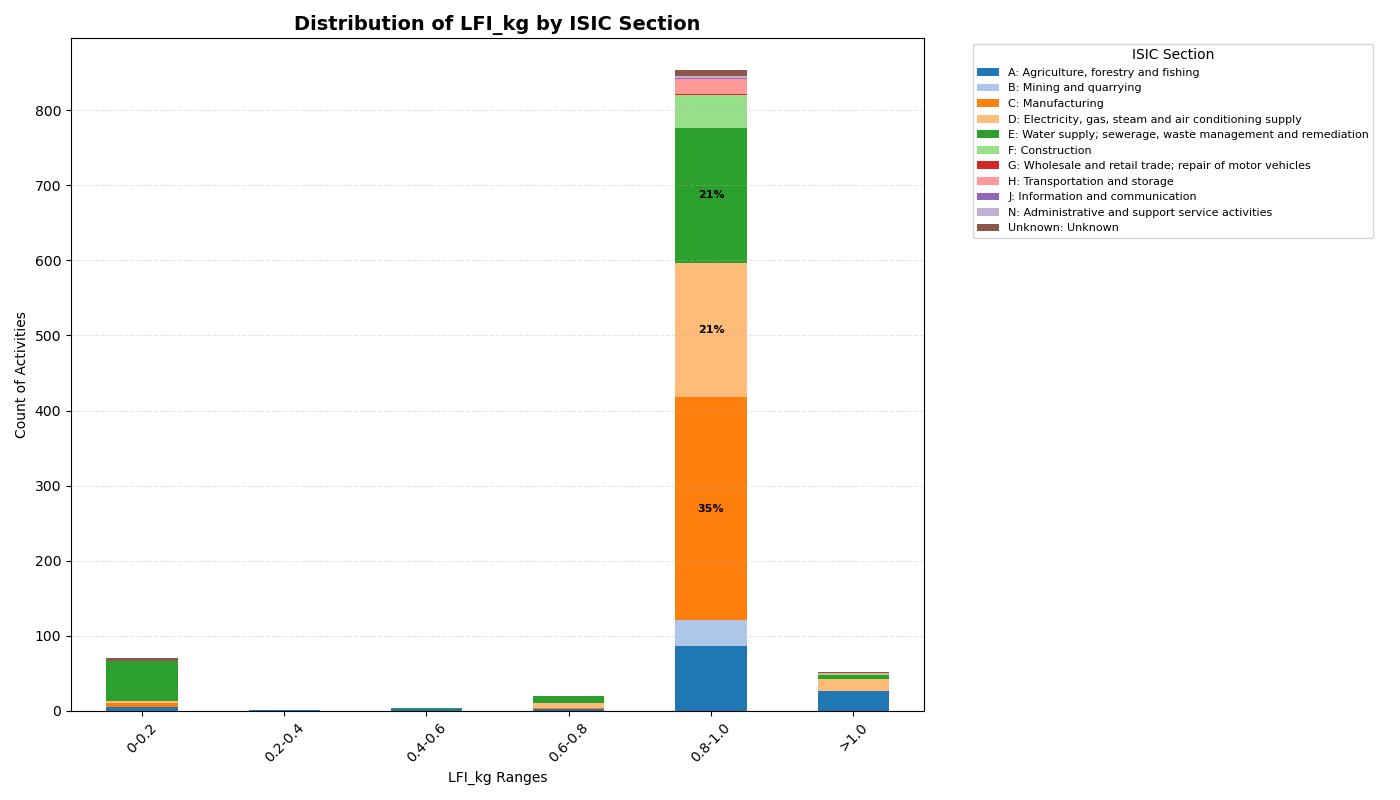

Total activities: 1000
Number of ISIC Section groups: 11

Distribution of LFI_kg:
0-0.2: 70 activities (7.0%)
0.2-0.4: 1 activities (0.1%)
0.4-0.6: 4 activities (0.4%)
0.6-0.8: 20 activities (2.0%)
0.8-1.0: 853 activities (85.3%)
>1.0: 52 activities (5.2%)

Detailed percentage breakdown by ISIC Section:

0-0.2 range:
  A: 7.1%
  C: 8.6%
  D: 2.9%
  E: 75.7%
  Unknown: 5.7%

0.2-0.4 range:
  A: 100.0%

0.4-0.6 range:
  A: 50.0%
  E: 50.0%

0.6-0.8 range:
  A: 15.0%
  C: 5.0%
  D: 35.0%
  E: 45.0%

0.8-1.0 range:
  A: 10.1%
  B: 4.1%
  C: 34.8%
  D: 21.0%
  E: 21.0%
  F: 5.2%
  G: 0.2%
  H: 2.2%
  J: 0.2%
  N: 0.2%
  Unknown: 0.9%

>1.0 range:
  A: 50.0%
  C: 1.9%
  D: 30.8%
  E: 9.6%
  F: 1.9%
  H: 1.9%
  Unknown: 3.8%
Plot saved as: results_histogram_1-plot-per-CI/CFI_kg_distribution_ISIC Section.png


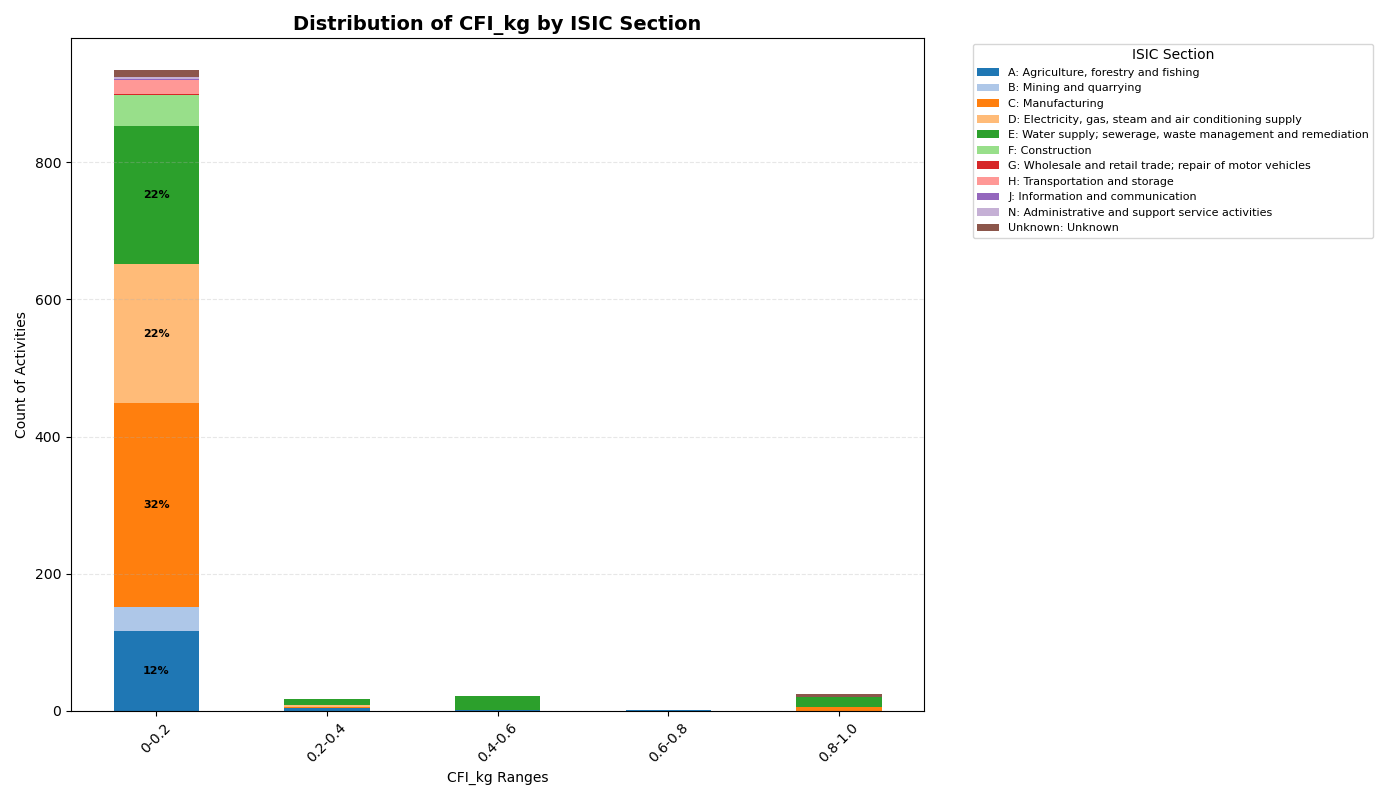

Total activities: 1000
Number of ISIC Section groups: 11

Distribution of CFI_kg:
0-0.2: 934 activities (93.4%)
0.2-0.4: 17 activities (1.7%)
0.4-0.6: 22 activities (2.2%)
0.6-0.8: 2 activities (0.2%)
0.8-1.0: 25 activities (2.5%)
>1.0: 0 activities (0.0%)

Detailed percentage breakdown by ISIC Section:

0-0.2 range:
  A: 12.4%
  B: 3.7%
  C: 31.9%
  D: 21.6%
  E: 21.6%
  F: 4.8%
  G: 0.2%
  H: 2.1%
  J: 0.2%
  N: 0.2%
  Unknown: 1.1%

0.2-0.4 range:
  A: 29.4%
  C: 5.9%
  D: 11.8%
  E: 52.9%

0.4-0.6 range:
  A: 4.5%
  E: 95.5%

0.6-0.8 range:
  A: 50.0%
  E: 50.0%

0.8-1.0 range:
  C: 24.0%
  E: 60.0%
  Unknown: 16.0%
Plot saved as: results_histogram_1-plot-per-CI/LFI_MJ_distribution_ISIC Section.png


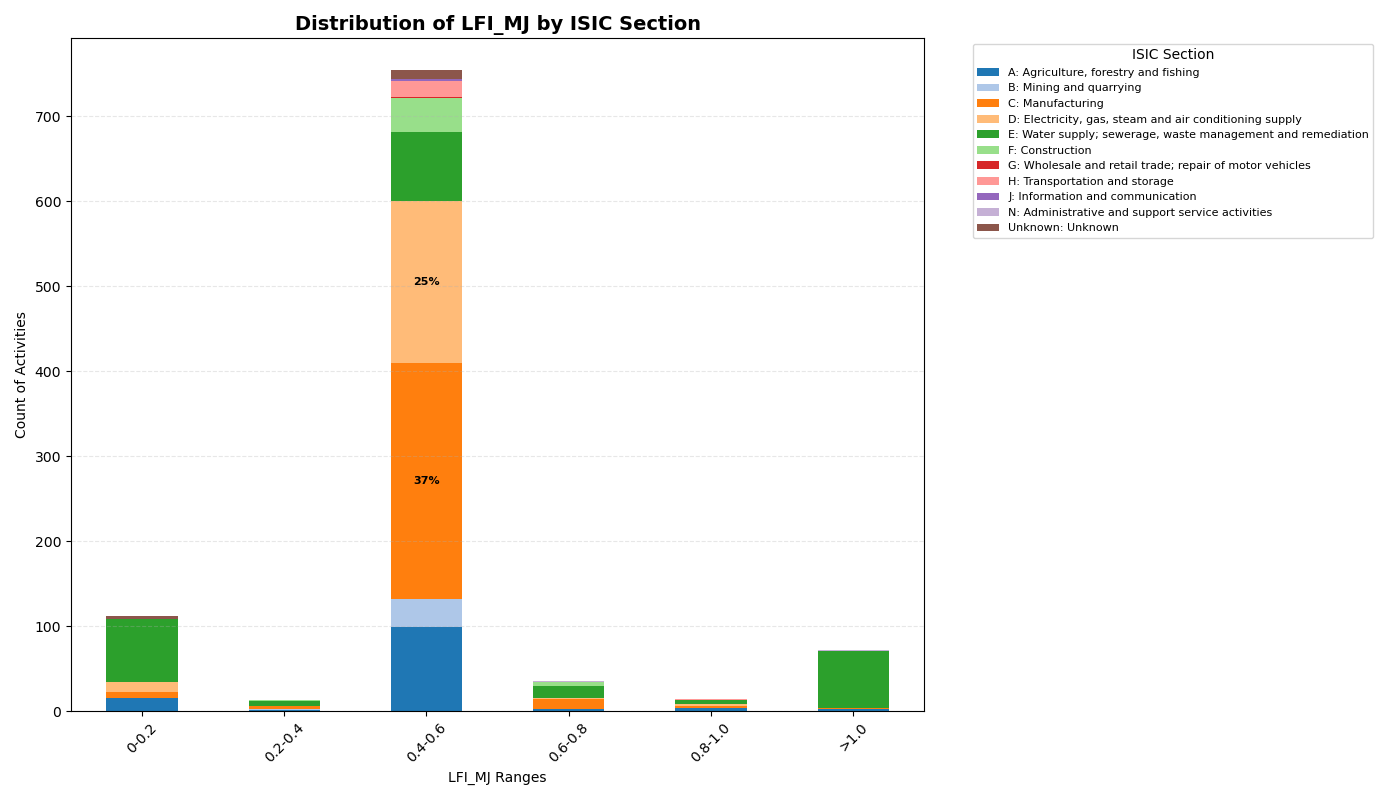

Total activities: 1000
Number of ISIC Section groups: 11

Distribution of LFI_MJ:
0-0.2: 112 activities (11.2%)
0.2-0.4: 13 activities (1.3%)
0.4-0.6: 754 activities (75.4%)
0.6-0.8: 35 activities (3.5%)
0.8-1.0: 14 activities (1.4%)
>1.0: 72 activities (7.2%)

Detailed percentage breakdown by ISIC Section:

0-0.2 range:
  A: 13.4%
  C: 7.1%
  D: 9.8%
  E: 66.1%
  Unknown: 3.6%

0.2-0.4 range:
  A: 7.7%
  B: 7.7%
  C: 30.8%
  E: 46.2%
  F: 7.7%

0.4-0.6 range:
  A: 13.1%
  B: 4.4%
  C: 36.9%
  D: 25.2%
  E: 10.7%
  F: 5.3%
  G: 0.3%
  H: 2.5%
  J: 0.3%
  Unknown: 1.3%

0.6-0.8 range:
  A: 5.7%
  B: 2.9%
  C: 31.4%
  D: 2.9%
  E: 42.9%
  F: 11.4%
  N: 2.9%

0.8-1.0 range:
  A: 28.6%
  C: 14.3%
  D: 14.3%
  E: 35.7%
  H: 7.1%

>1.0 range:
  A: 2.8%
  C: 2.8%
  E: 93.1%
  N: 1.4%
Plot saved as: results_histogram_1-plot-per-CI/CFI_MJ_distribution_ISIC Section.png


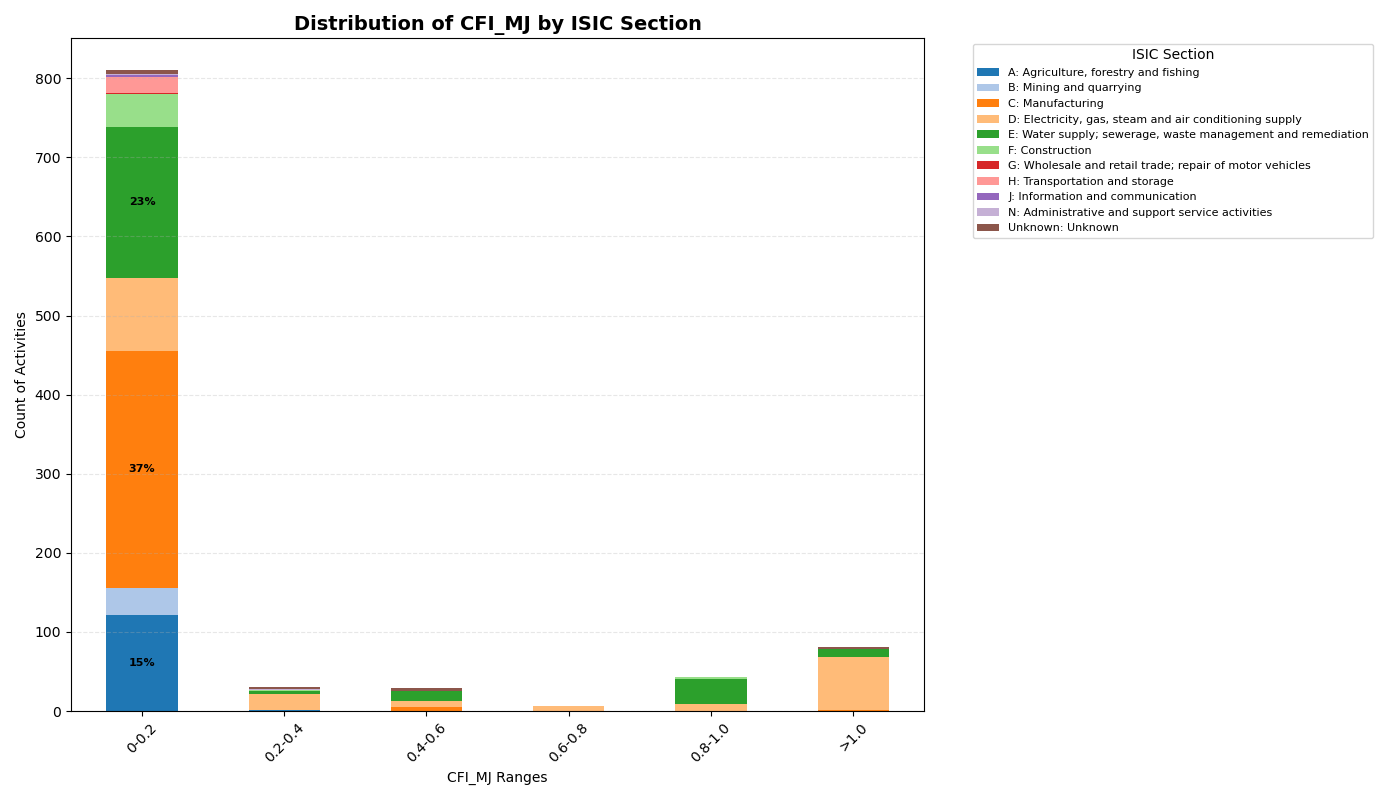

Total activities: 1000
Number of ISIC Section groups: 11

Distribution of CFI_MJ:
0-0.2: 810 activities (81.0%)
0.2-0.4: 30 activities (3.0%)
0.4-0.6: 29 activities (2.9%)
0.6-0.8: 7 activities (0.7%)
0.8-1.0: 43 activities (4.3%)
>1.0: 81 activities (8.1%)

Detailed percentage breakdown by ISIC Section:

0-0.2 range:
  A: 15.1%
  B: 4.2%
  C: 36.9%
  D: 11.5%
  E: 23.5%
  F: 5.2%
  G: 0.2%
  H: 2.5%
  J: 0.2%
  N: 0.1%
  Unknown: 0.6%

0.2-0.4 range:
  A: 3.3%
  B: 3.3%
  D: 66.7%
  E: 13.3%
  F: 3.3%
  N: 3.3%
  Unknown: 6.7%

0.4-0.6 range:
  C: 17.2%
  D: 27.6%
  E: 41.4%
  Unknown: 13.8%

0.6-0.8 range:
  D: 100.0%

0.8-1.0 range:
  D: 20.9%
  E: 74.4%
  F: 4.7%

>1.0 range:
  C: 1.2%
  D: 82.7%
  E: 12.3%
  Unknown: 3.7%
Plot saved as: results_histogram_1-plot-per-CI/eta-_kg_distribution_un_group.png


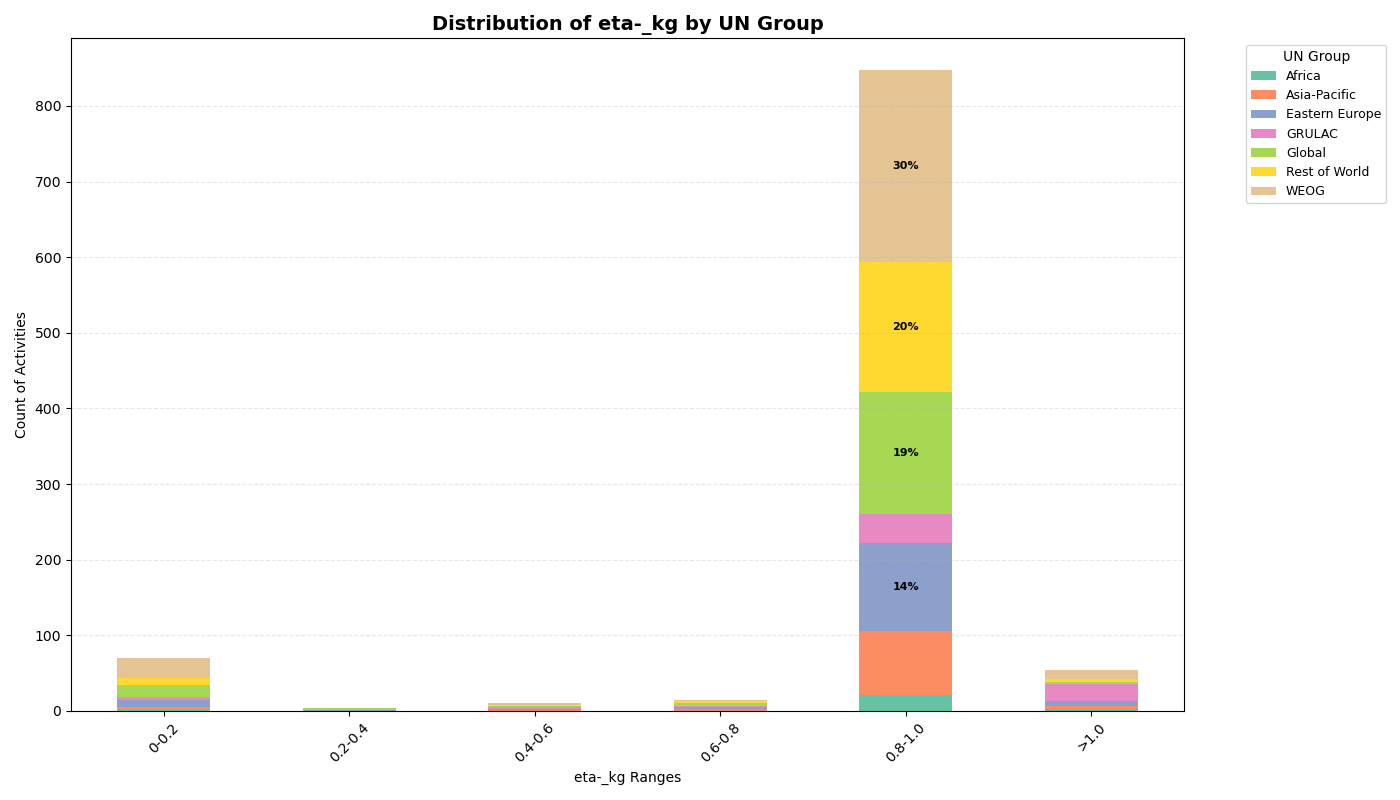

Total activities: 1000
Number of UN Group groups: 7

Distribution of eta-_kg:
0-0.2: 70 activities (7.0%)
0.2-0.4: 4 activities (0.4%)
0.4-0.6: 10 activities (1.0%)
0.6-0.8: 15 activities (1.5%)
0.8-1.0: 847 activities (84.7%)
>1.0: 54 activities (5.4%)

Detailed percentage breakdown by UN Group:

0-0.2 range:
  Africa: 1.4%
  Asia-Pacific: 5.7%
  Eastern Europe: 12.9%
  GRULAC: 7.1%
  Global: 21.4%
  Rest of World: 14.3%
  WEOG: 37.1%

0.2-0.4 range:
  Eastern Europe: 25.0%
  Global: 75.0%

0.4-0.6 range:
  Asia-Pacific: 10.0%
  Eastern Europe: 20.0%
  GRULAC: 20.0%
  Global: 10.0%
  Rest of World: 20.0%
  WEOG: 20.0%

0.6-0.8 range:
  Asia-Pacific: 20.0%
  Eastern Europe: 13.3%
  GRULAC: 13.3%
  Global: 20.0%
  Rest of World: 20.0%
  WEOG: 13.3%

0.8-1.0 range:
  Africa: 2.5%
  Asia-Pacific: 10.0%
  Eastern Europe: 13.7%
  GRULAC: 4.6%
  Global: 19.0%
  Rest of World: 20.2%
  WEOG: 30.0%

>1.0 range:
  Africa: 3.7%
  Asia-Pacific: 9.3%
  Eastern Europe: 11.1%
  GRULAC: 42.6%
  Global

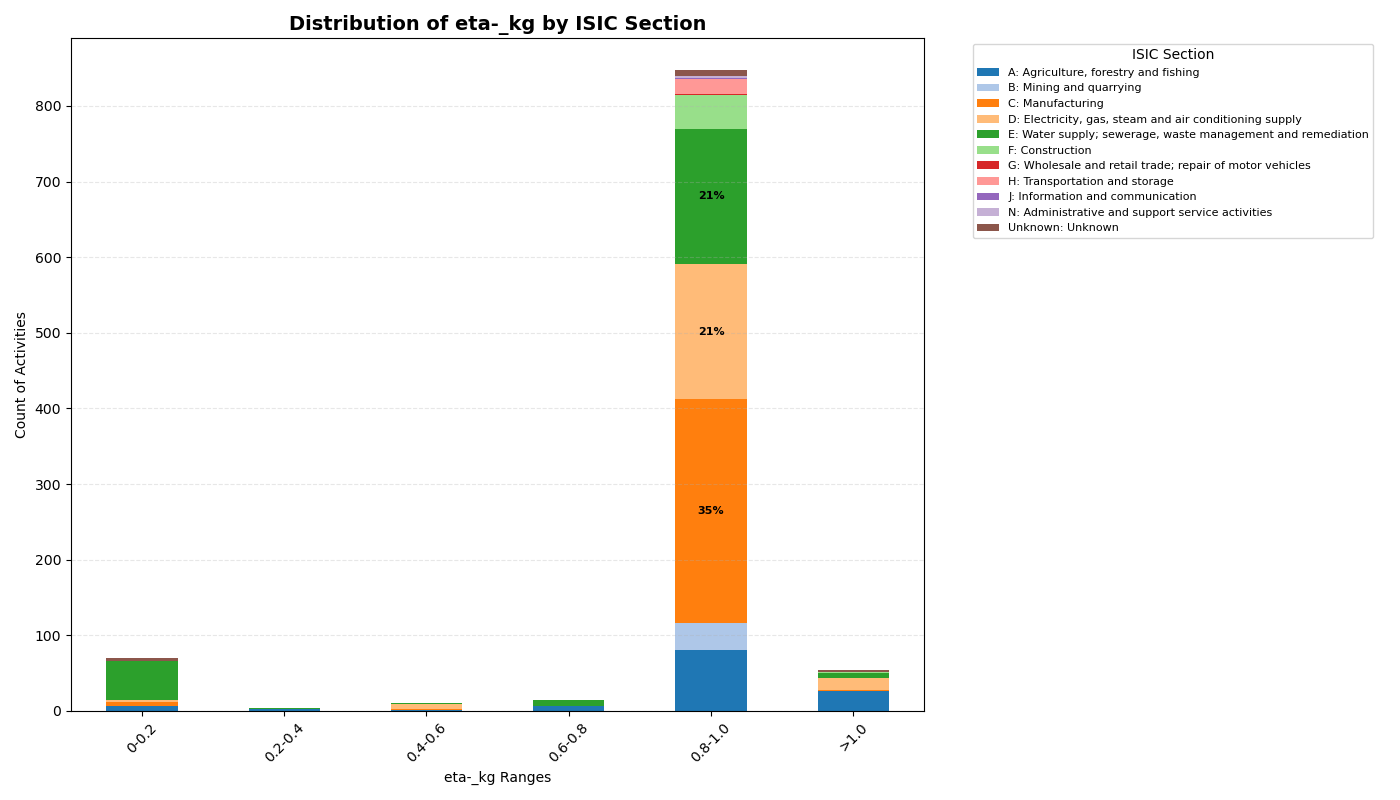

Total activities: 1000
Number of ISIC Section groups: 11

Distribution of eta-_kg:
0-0.2: 70 activities (7.0%)
0.2-0.4: 4 activities (0.4%)
0.4-0.6: 10 activities (1.0%)
0.6-0.8: 15 activities (1.5%)
0.8-1.0: 847 activities (84.7%)
>1.0: 54 activities (5.4%)

Detailed percentage breakdown by ISIC Section:

0-0.2 range:
  A: 8.6%
  C: 8.6%
  D: 2.9%
  E: 74.3%
  Unknown: 5.7%

0.2-0.4 range:
  A: 50.0%
  E: 50.0%

0.4-0.6 range:
  A: 10.0%
  C: 10.0%
  D: 70.0%
  E: 10.0%

0.6-0.8 range:
  A: 40.0%
  C: 6.7%
  E: 53.3%

0.8-1.0 range:
  A: 9.6%
  B: 4.1%
  C: 34.9%
  D: 21.1%
  E: 21.1%
  F: 5.2%
  G: 0.2%
  H: 2.2%
  J: 0.2%
  N: 0.2%
  Unknown: 0.9%

>1.0 range:
  A: 50.0%
  C: 1.9%
  D: 29.6%
  E: 11.1%
  F: 1.9%
  H: 1.9%
  Unknown: 3.7%
Plot saved as: results_histogram_1-plot-per-CI/eta+_kg_distribution_ISIC Section.png


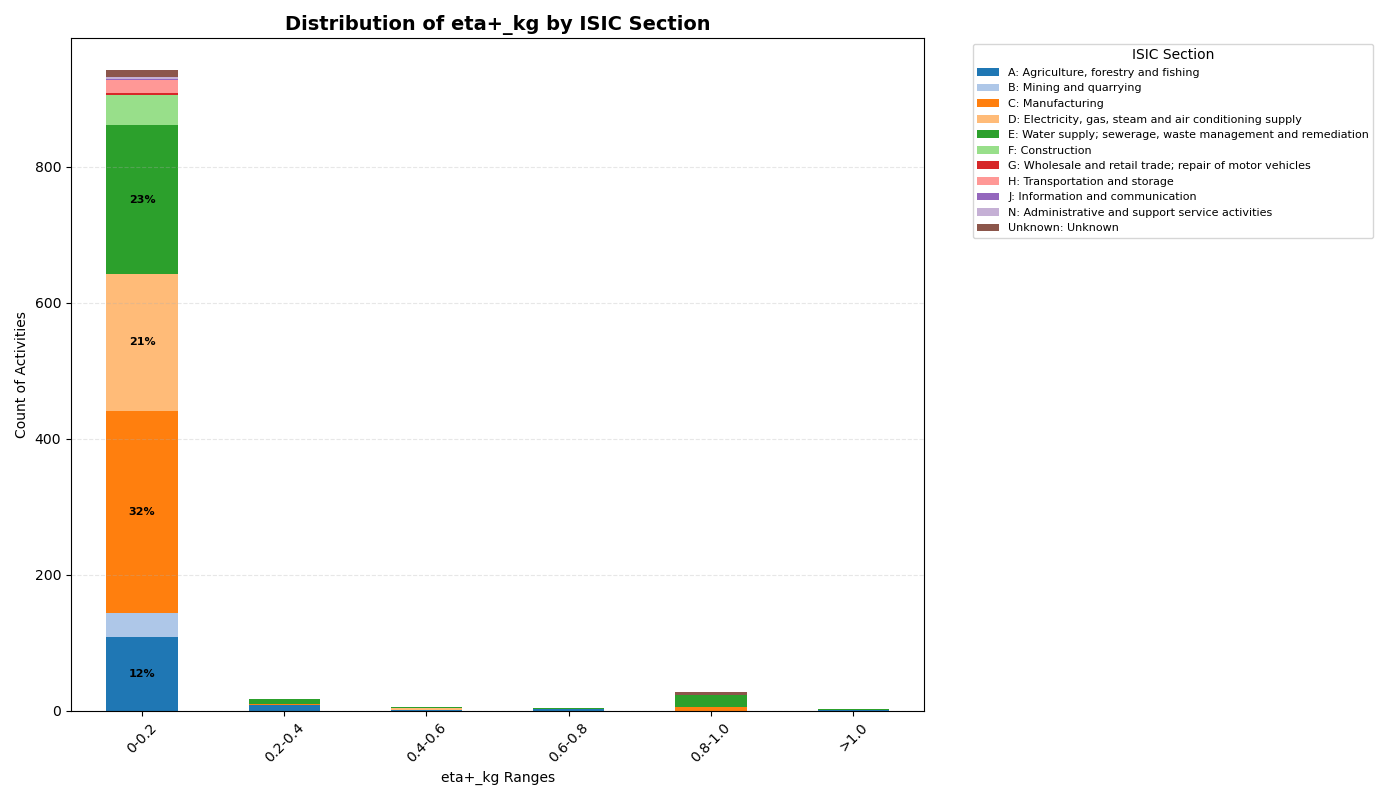

Total activities: 1000
Number of ISIC Section groups: 11

Distribution of eta+_kg:
0-0.2: 942 activities (94.2%)
0.2-0.4: 17 activities (1.7%)
0.4-0.6: 6 activities (0.6%)
0.6-0.8: 4 activities (0.4%)
0.8-1.0: 28 activities (2.8%)
>1.0: 3 activities (0.3%)

Detailed percentage breakdown by ISIC Section:

0-0.2 range:
  A: 11.6%
  B: 3.7%
  C: 31.5%
  D: 21.4%
  E: 23.1%
  F: 4.8%
  G: 0.2%
  H: 2.1%
  J: 0.2%
  N: 0.2%
  Unknown: 1.1%

0.2-0.4 range:
  A: 52.9%
  C: 5.9%
  E: 41.2%

0.4-0.6 range:
  A: 16.7%
  C: 16.7%
  D: 33.3%
  E: 33.3%

0.6-0.8 range:
  A: 75.0%
  E: 25.0%

0.8-1.0 range:
  C: 21.4%
  E: 64.3%
  Unknown: 14.3%

>1.0 range:
  A: 33.3%
  E: 66.7%
Plot saved as: results_histogram_1-plot-per-CI/eta+_kg_distribution_un_group.png


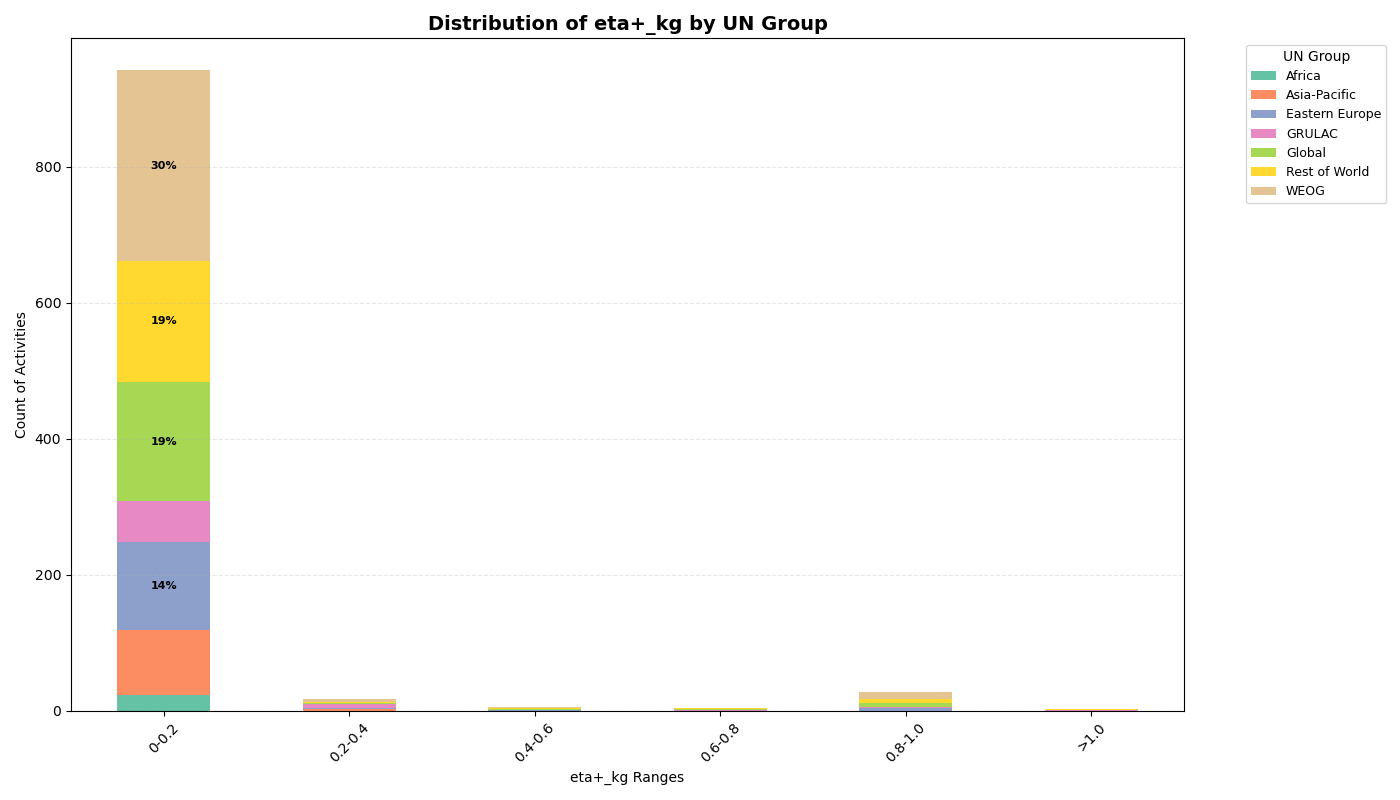

Total activities: 1000
Number of UN Group groups: 7

Distribution of eta+_kg:
0-0.2: 942 activities (94.2%)
0.2-0.4: 17 activities (1.7%)
0.4-0.6: 6 activities (0.6%)
0.6-0.8: 4 activities (0.4%)
0.8-1.0: 28 activities (2.8%)
>1.0: 3 activities (0.3%)

Detailed percentage breakdown by UN Group:

0-0.2 range:
  Africa: 2.5%
  Asia-Pacific: 10.1%
  Eastern Europe: 13.8%
  GRULAC: 6.3%
  Global: 18.7%
  Rest of World: 18.9%
  WEOG: 29.7%

0.2-0.4 range:
  Asia-Pacific: 17.6%
  Eastern Europe: 5.9%
  GRULAC: 35.3%
  Global: 5.9%
  Rest of World: 11.8%
  WEOG: 23.5%

0.4-0.6 range:
  Eastern Europe: 16.7%
  GRULAC: 16.7%
  Global: 16.7%
  Rest of World: 16.7%
  WEOG: 33.3%

0.6-0.8 range:
  GRULAC: 50.0%
  Global: 25.0%
  Rest of World: 25.0%

0.8-1.0 range:
  Eastern Europe: 14.3%
  GRULAC: 7.1%
  Global: 21.4%
  Rest of World: 21.4%
  WEOG: 35.7%

>1.0 range:
  GRULAC: 33.3%
  Rest of World: 66.7%
Plot saved as: results_histogram_1-plot-per-CI/eta-_MJ_distribution_un_group.png


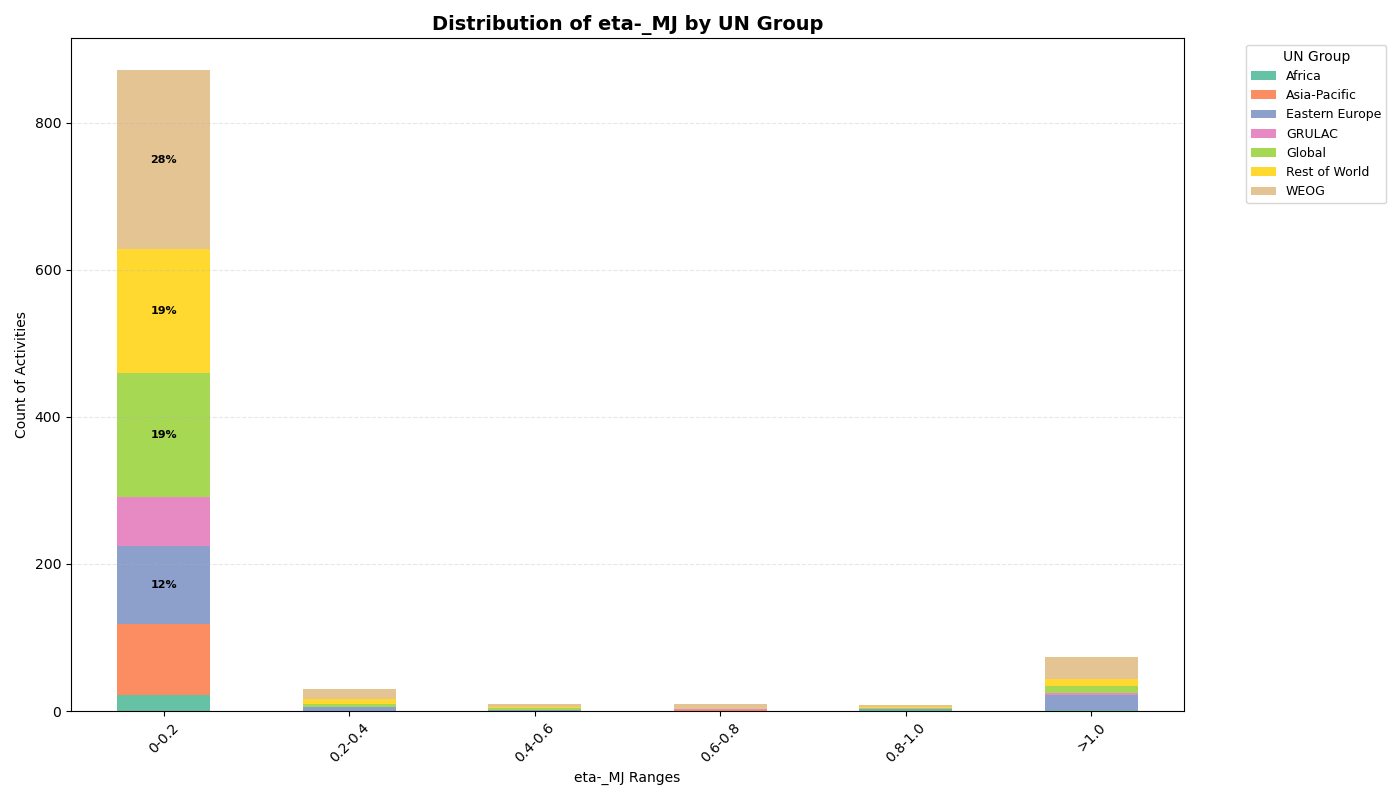

Total activities: 1000
Number of UN Group groups: 7

Distribution of eta-_MJ:
0-0.2: 871 activities (87.1%)
0.2-0.4: 30 activities (3.0%)
0.4-0.6: 9 activities (0.9%)
0.6-0.8: 9 activities (0.9%)
0.8-1.0: 8 activities (0.8%)
>1.0: 73 activities (7.3%)

Detailed percentage breakdown by UN Group:

0-0.2 range:
  Africa: 2.5%
  Asia-Pacific: 11.0%
  Eastern Europe: 12.2%
  GRULAC: 7.7%
  Global: 19.3%
  Rest of World: 19.4%
  WEOG: 27.9%

0.2-0.4 range:
  Eastern Europe: 20.0%
  Global: 13.3%
  Rest of World: 23.3%
  WEOG: 43.3%

0.4-0.6 range:
  Eastern Europe: 11.1%
  GRULAC: 11.1%
  Global: 22.2%
  Rest of World: 22.2%
  WEOG: 33.3%

0.6-0.8 range:
  Asia-Pacific: 11.1%
  Eastern Europe: 11.1%
  GRULAC: 11.1%
  WEOG: 66.7%

0.8-1.0 range:
  Africa: 12.5%
  Asia-Pacific: 12.5%
  Eastern Europe: 12.5%
  Global: 12.5%
  Rest of World: 25.0%
  WEOG: 25.0%

>1.0 range:
  Africa: 1.4%
  Eastern Europe: 28.8%
  GRULAC: 2.7%
  Global: 13.7%
  Rest of World: 13.7%
  WEOG: 39.7%
Plot saved as: r

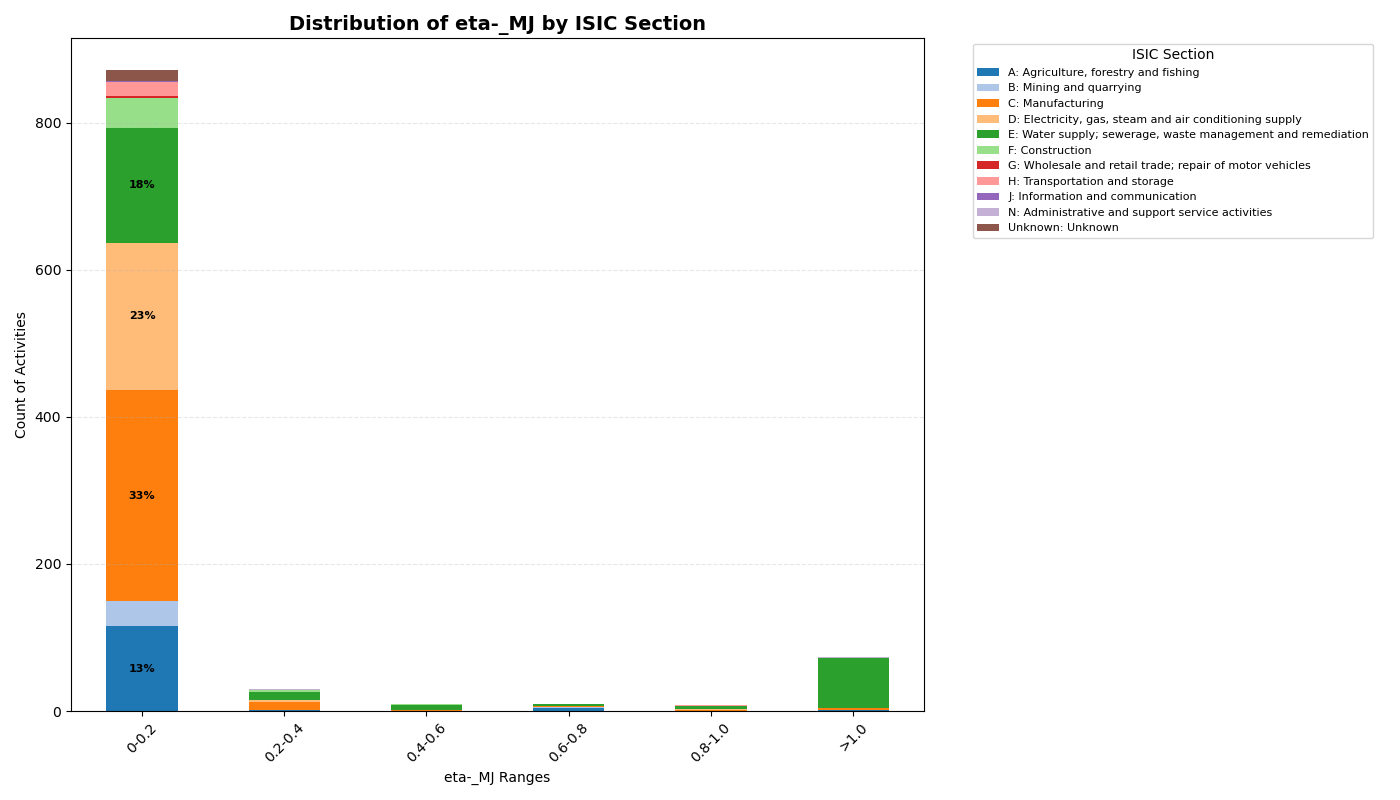

Total activities: 1000
Number of ISIC Section groups: 11

Distribution of eta-_MJ:
0-0.2: 871 activities (87.1%)
0.2-0.4: 30 activities (3.0%)
0.4-0.6: 9 activities (0.9%)
0.6-0.8: 9 activities (0.9%)
0.8-1.0: 8 activities (0.8%)
>1.0: 73 activities (7.3%)

Detailed percentage breakdown by ISIC Section:

0-0.2 range:
  A: 13.2%
  B: 3.9%
  C: 33.1%
  D: 22.8%
  E: 18.0%
  F: 4.7%
  G: 0.2%
  H: 2.2%
  J: 0.2%
  Unknown: 1.6%

0.2-0.4 range:
  A: 6.7%
  C: 33.3%
  D: 10.0%
  E: 36.7%
  F: 10.0%
  N: 3.3%

0.4-0.6 range:
  C: 22.2%
  E: 66.7%
  F: 11.1%

0.6-0.8 range:
  A: 44.4%
  B: 11.1%
  C: 22.2%
  E: 22.2%

0.8-1.0 range:
  C: 12.5%
  D: 25.0%
  E: 50.0%
  H: 12.5%

>1.0 range:
  A: 2.7%
  C: 2.7%
  E: 93.2%
  N: 1.4%


C:\Users\lfreboeuf\AppData\Local\Temp\ipykernel_20828\3757886109.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(14, 8))  # Slightly wider for better legend spacing


Plot saved as: results_histogram_1-plot-per-CI/eta+_MJ_distribution_un_group.png


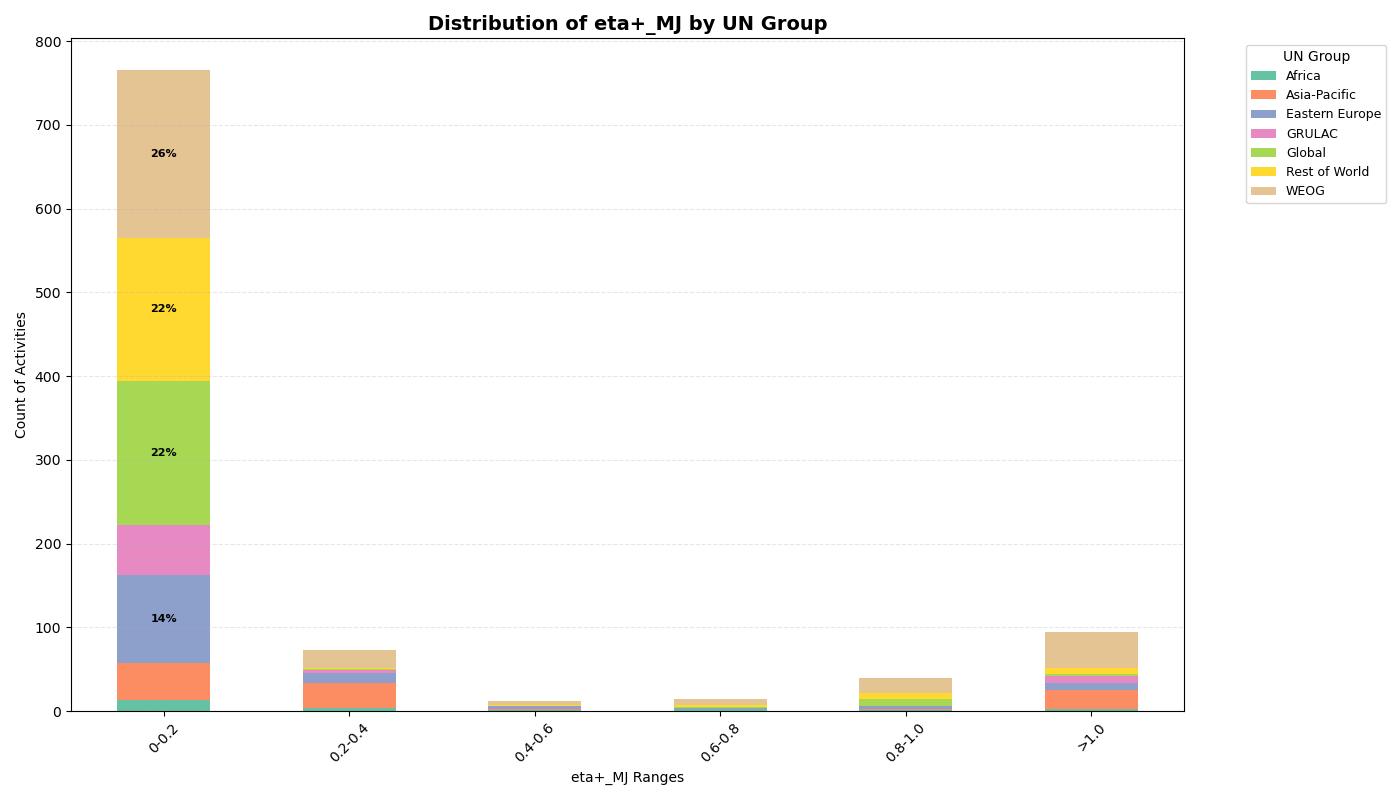

Total activities: 1000
Number of UN Group groups: 7

Distribution of eta+_MJ:
0-0.2: 765 activities (76.5%)
0.2-0.4: 73 activities (7.3%)
0.4-0.6: 12 activities (1.2%)
0.6-0.8: 15 activities (1.5%)
0.8-1.0: 40 activities (4.0%)
>1.0: 95 activities (9.5%)

Detailed percentage breakdown by UN Group:

0-0.2 range:
  Africa: 1.7%
  Asia-Pacific: 5.8%
  Eastern Europe: 13.9%
  GRULAC: 7.7%
  Global: 22.5%
  Rest of World: 22.4%
  WEOG: 26.1%

0.2-0.4 range:
  Africa: 5.5%
  Asia-Pacific: 39.7%
  Eastern Europe: 16.4%
  GRULAC: 5.5%
  Global: 1.4%
  Rest of World: 2.7%
  WEOG: 28.8%

0.4-0.6 range:
  Africa: 8.3%
  Asia-Pacific: 16.7%
  Eastern Europe: 25.0%
  Rest of World: 8.3%
  WEOG: 41.7%

0.6-0.8 range:
  Africa: 13.3%
  Eastern Europe: 13.3%
  Global: 6.7%
  Rest of World: 13.3%
  WEOG: 53.3%

0.8-1.0 range:
  Africa: 2.5%
  Asia-Pacific: 2.5%
  Eastern Europe: 10.0%
  Global: 22.5%
  Rest of World: 17.5%
  WEOG: 45.0%

>1.0 range:
  Africa: 3.2%
  Asia-Pacific: 23.2%
  Eastern Europe

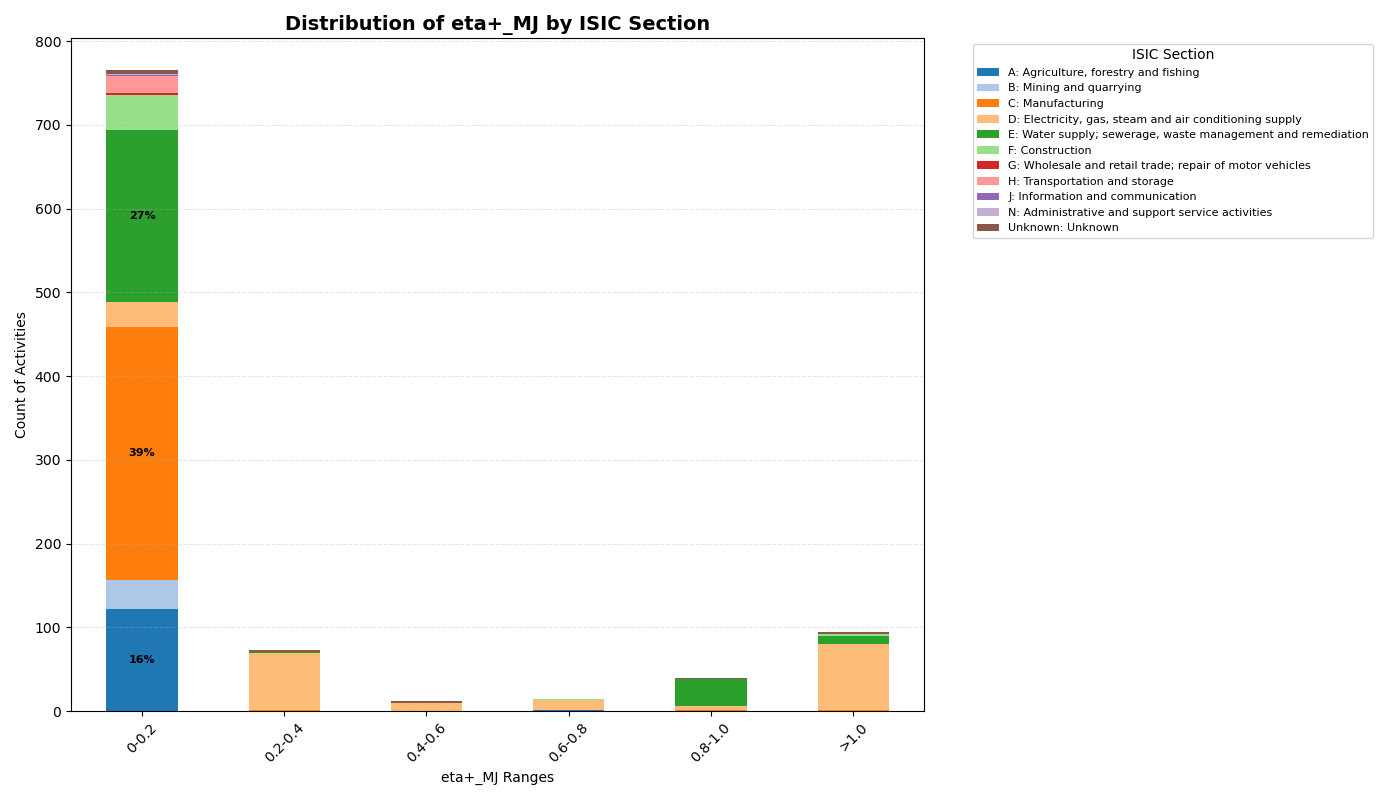

Total activities: 1000
Number of ISIC Section groups: 11

Distribution of eta+_MJ:
0-0.2: 765 activities (76.5%)
0.2-0.4: 73 activities (7.3%)
0.4-0.6: 12 activities (1.2%)
0.6-0.8: 15 activities (1.5%)
0.8-1.0: 40 activities (4.0%)
>1.0: 95 activities (9.5%)

Detailed percentage breakdown by ISIC Section:

0-0.2 range:
  A: 15.9%
  B: 4.6%
  C: 39.5%
  D: 3.9%
  E: 26.8%
  F: 5.5%
  G: 0.3%
  H: 2.6%
  J: 0.3%
  N: 0.1%
  Unknown: 0.5%

0.2-0.4 range:
  C: 1.4%
  D: 93.2%
  E: 1.4%
  Unknown: 4.1%

0.4-0.6 range:
  D: 83.3%
  Unknown: 16.7%

0.6-0.8 range:
  A: 6.7%
  D: 80.0%
  F: 6.7%
  N: 6.7%

0.8-1.0 range:
  C: 2.5%
  D: 12.5%
  E: 80.0%
  Unknown: 5.0%

>1.0 range:
  C: 1.1%
  D: 83.2%
  E: 10.5%
  F: 2.1%
  Unknown: 3.2%


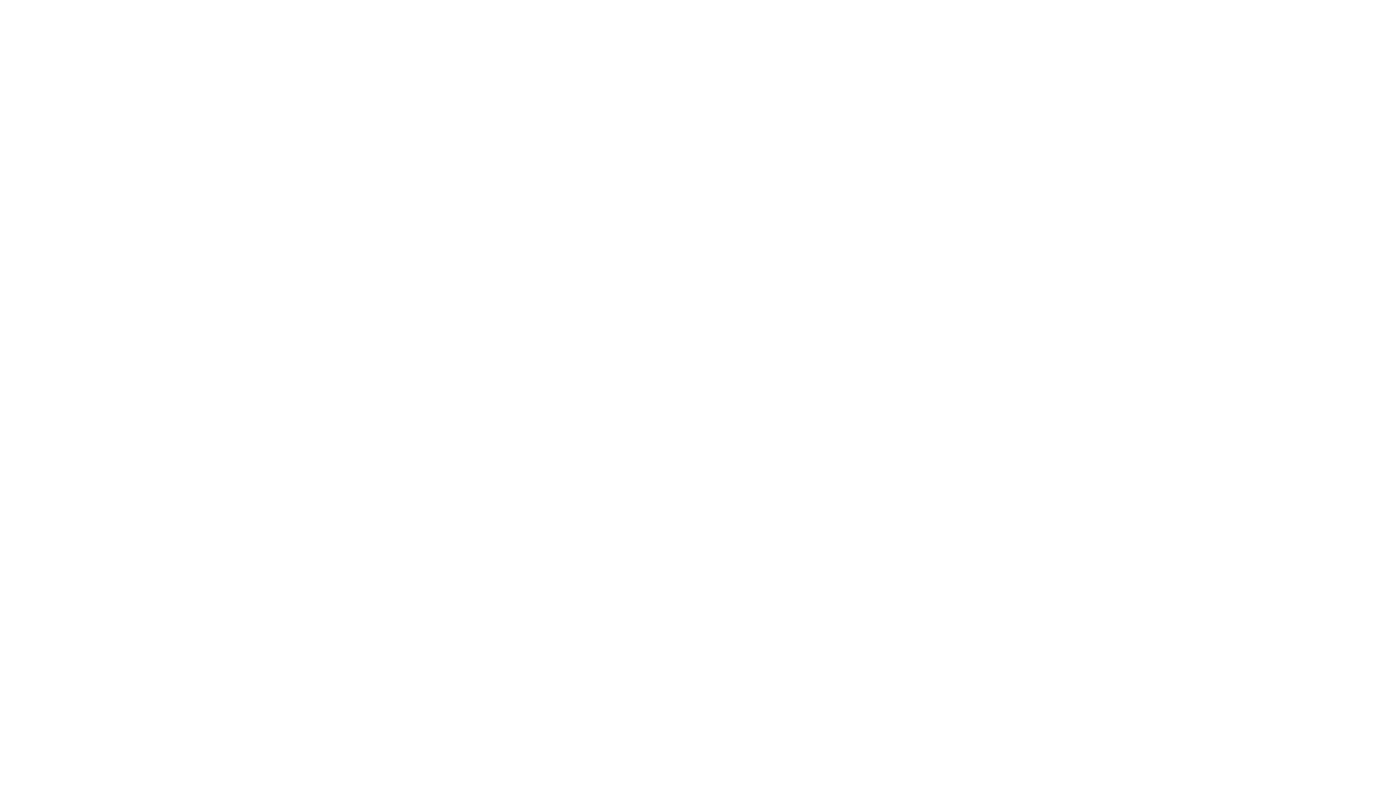

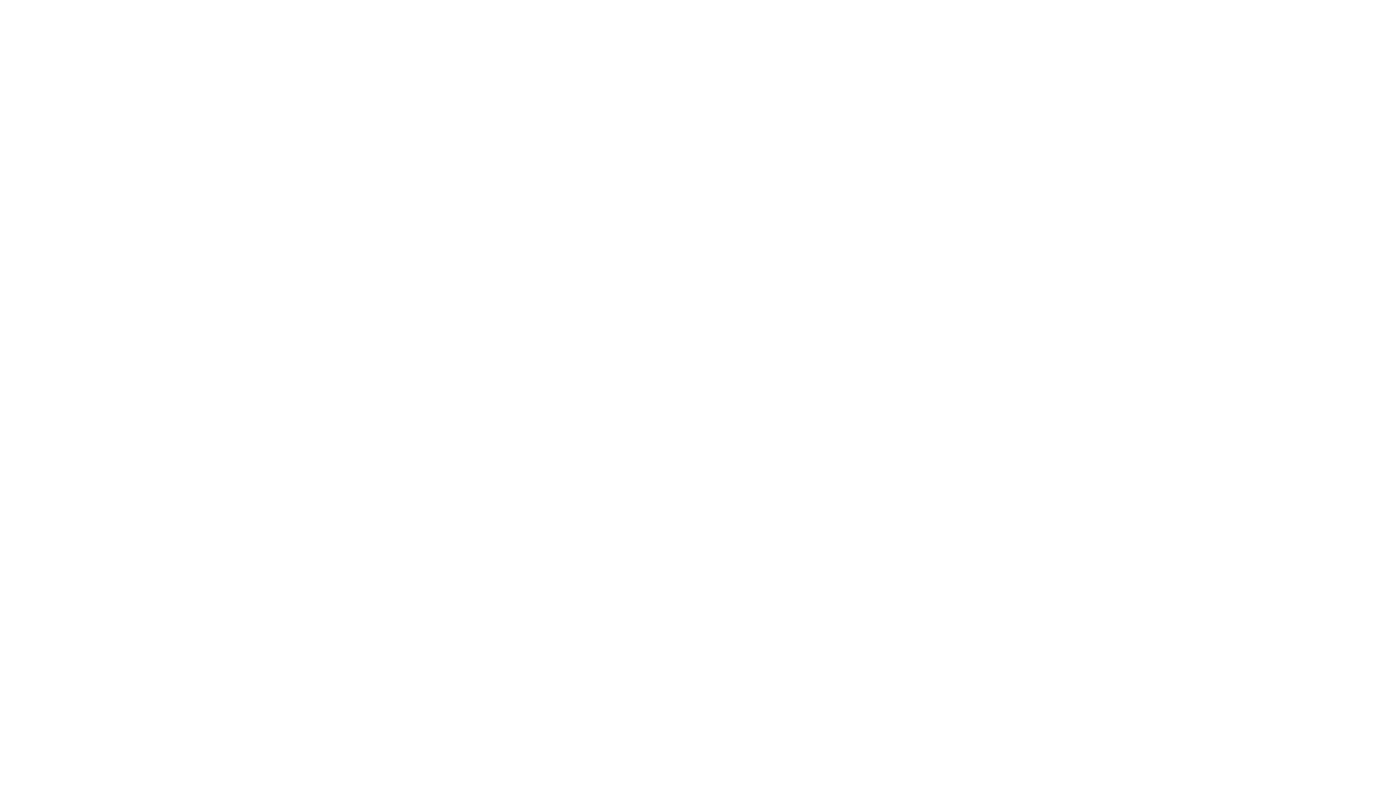

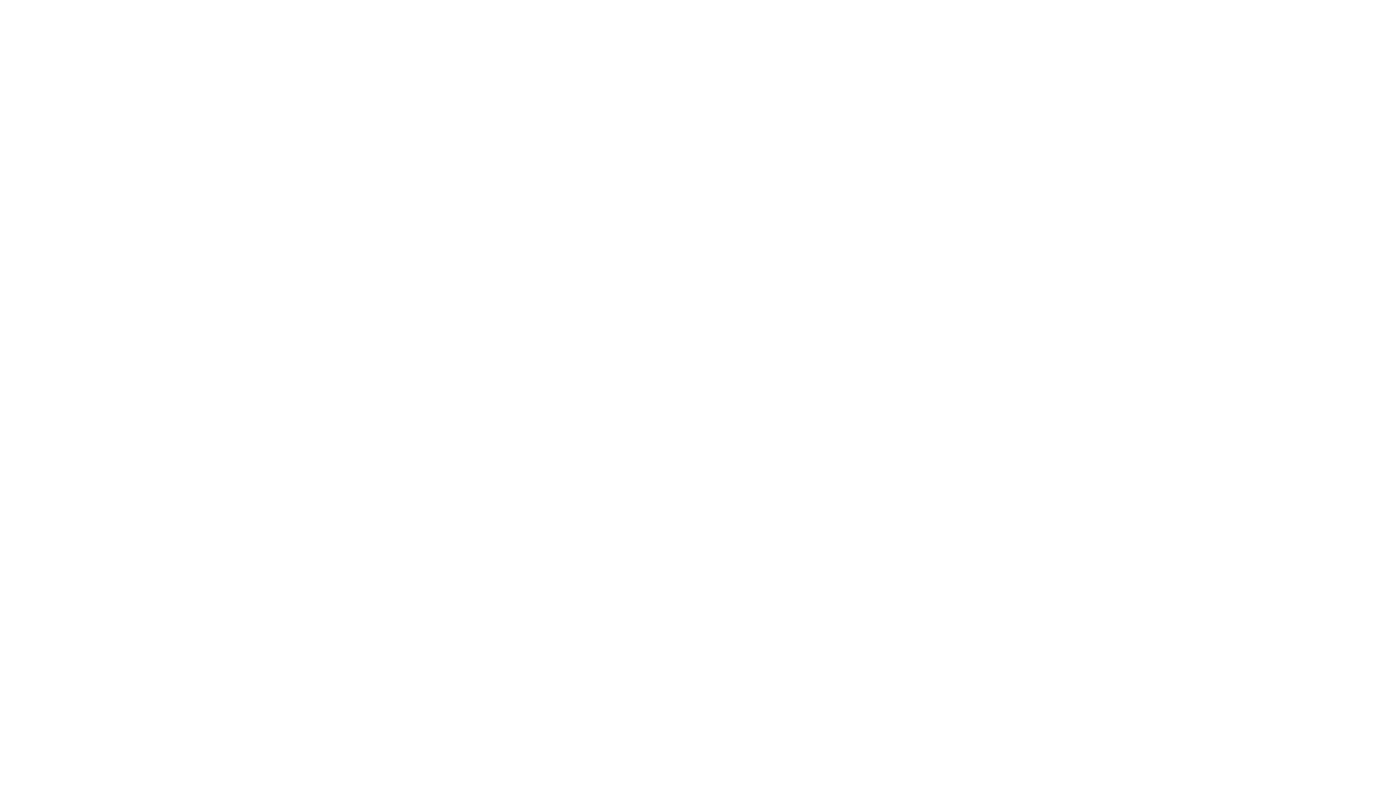

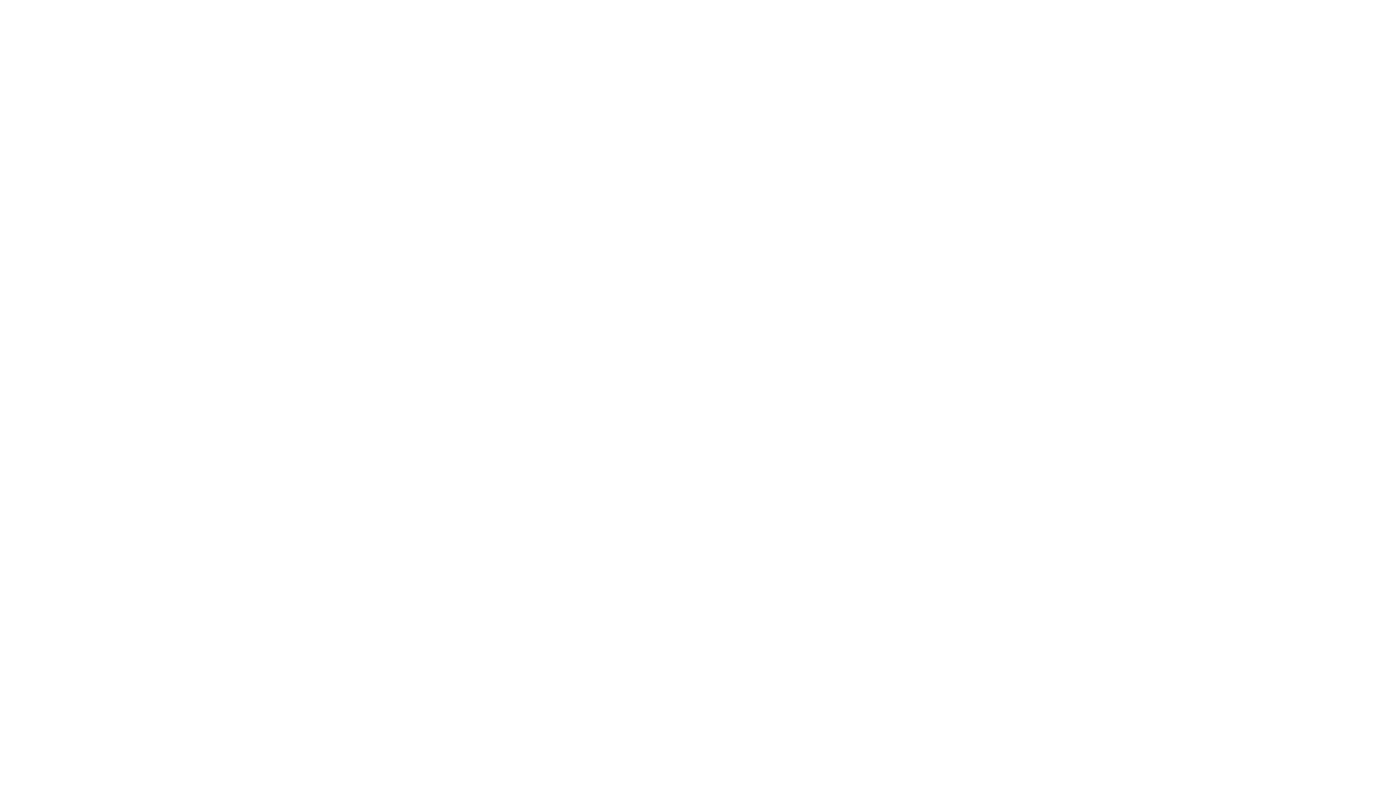

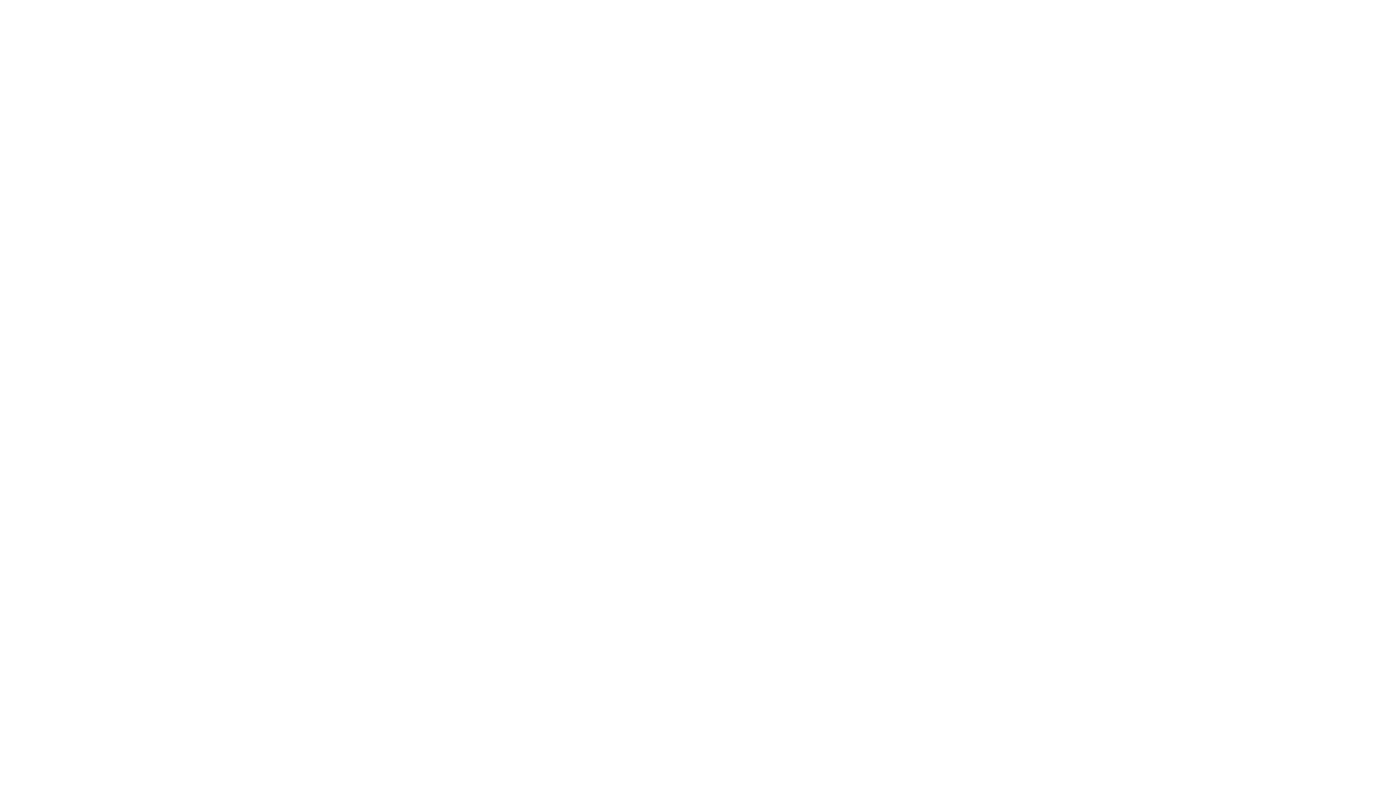

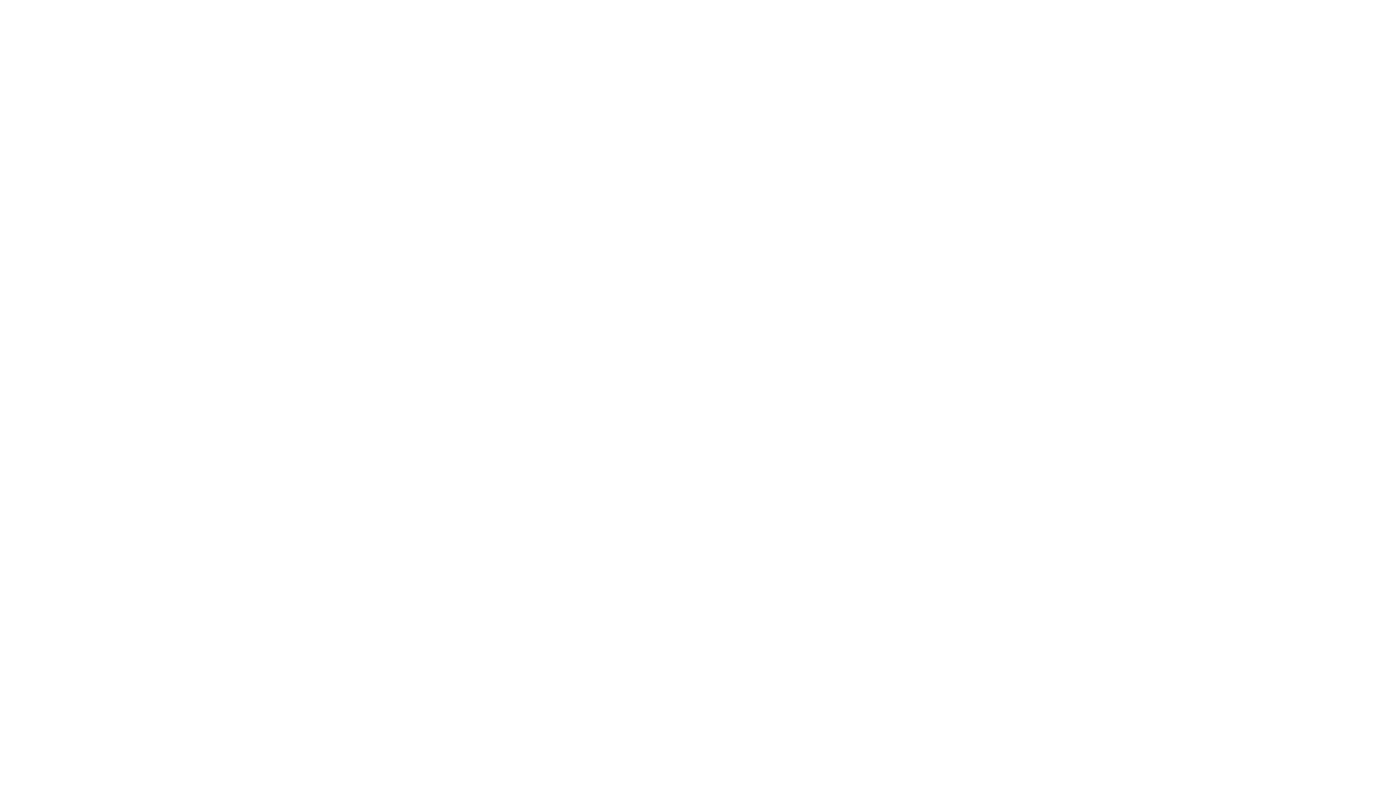

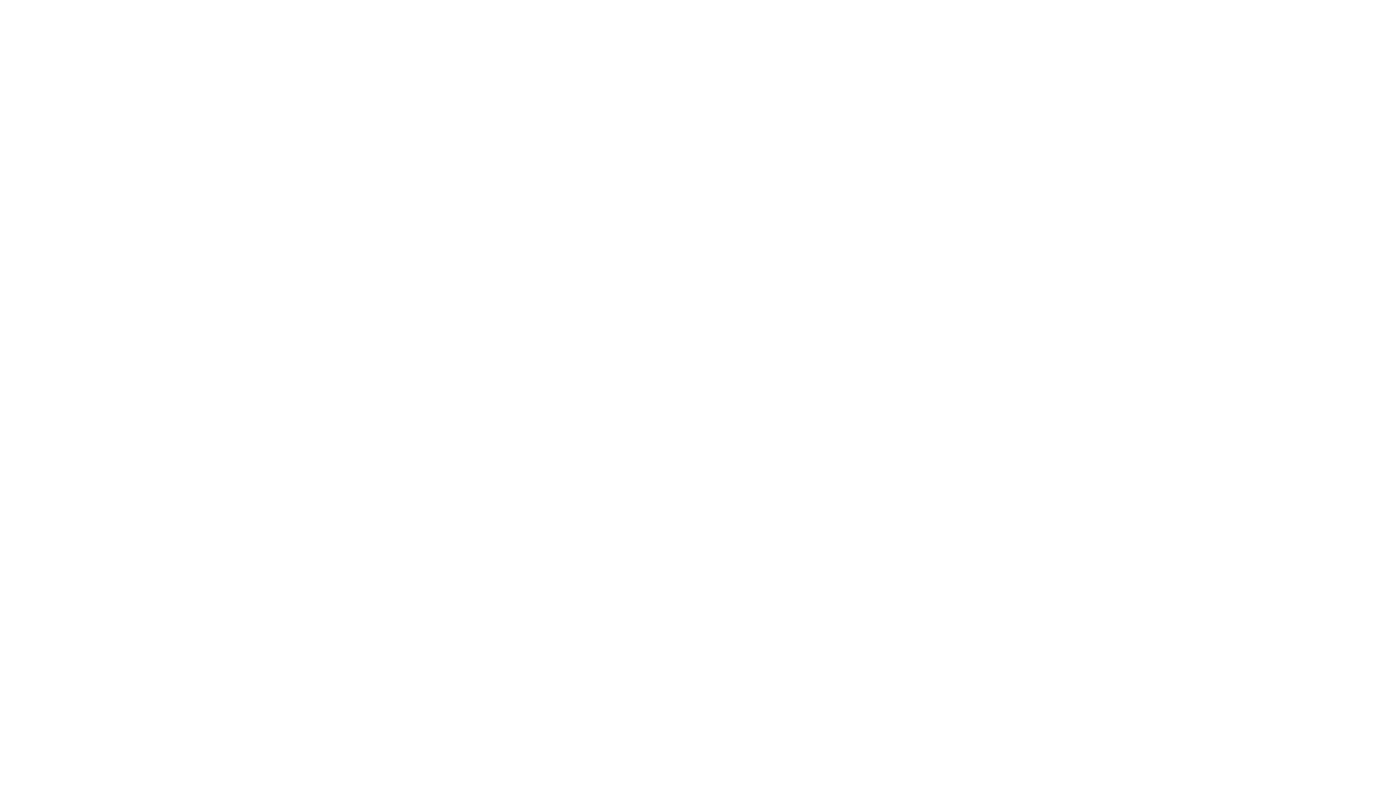

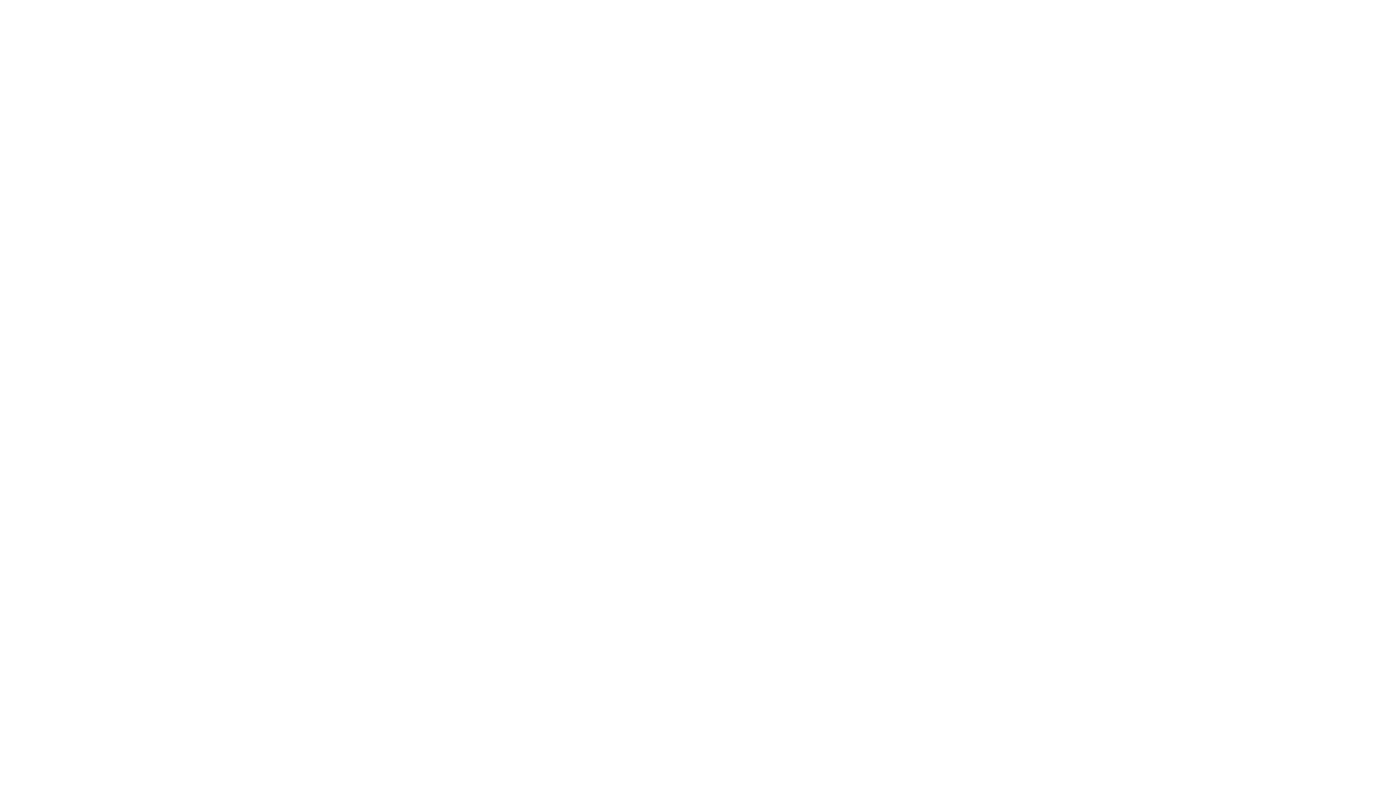

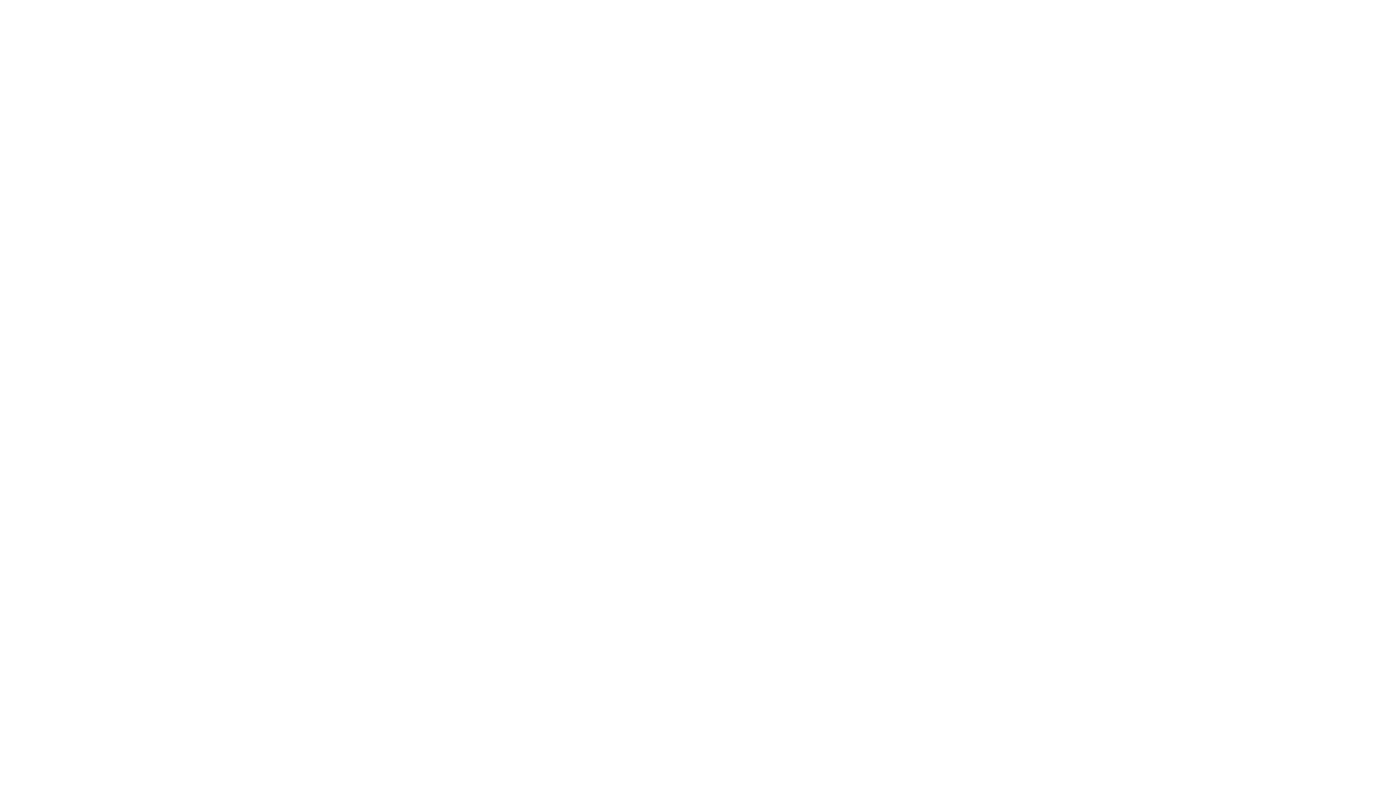

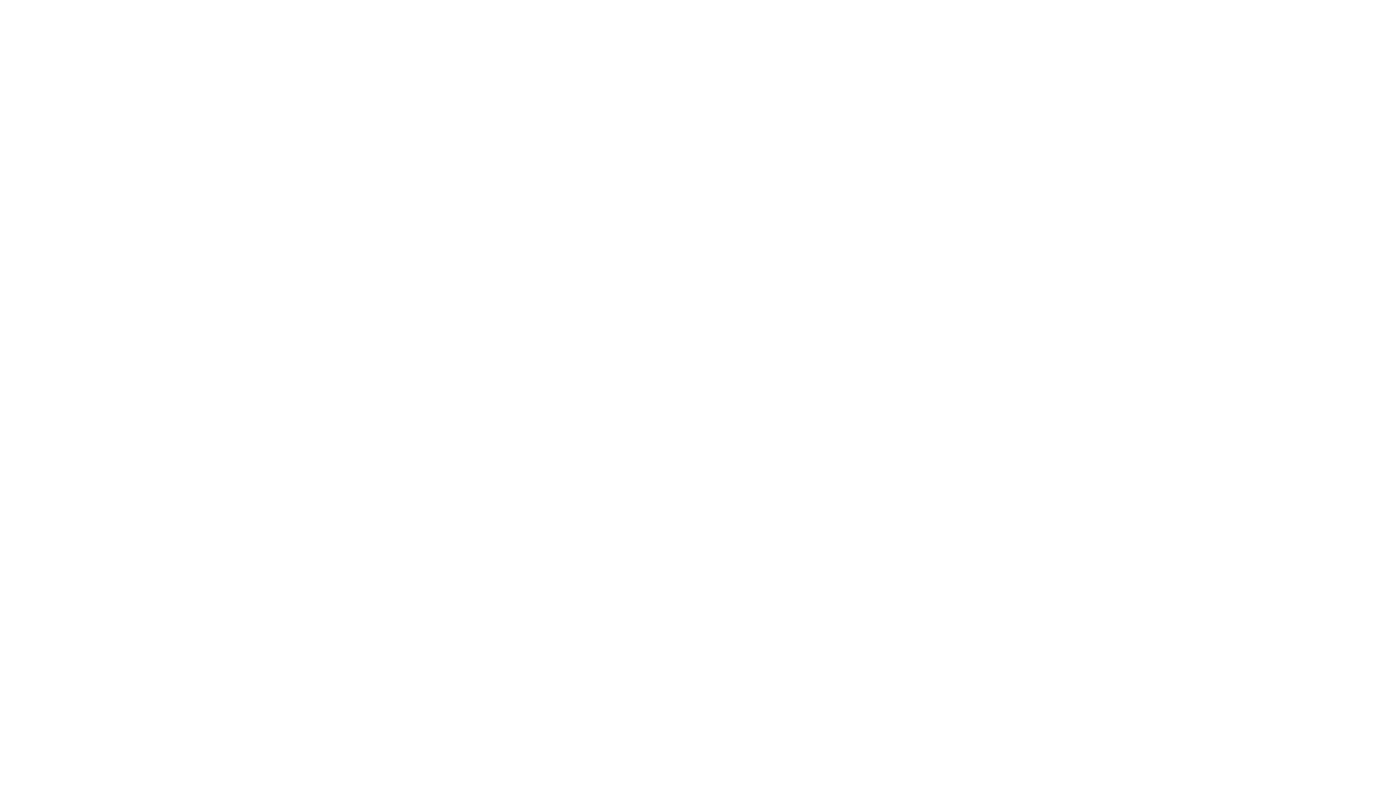

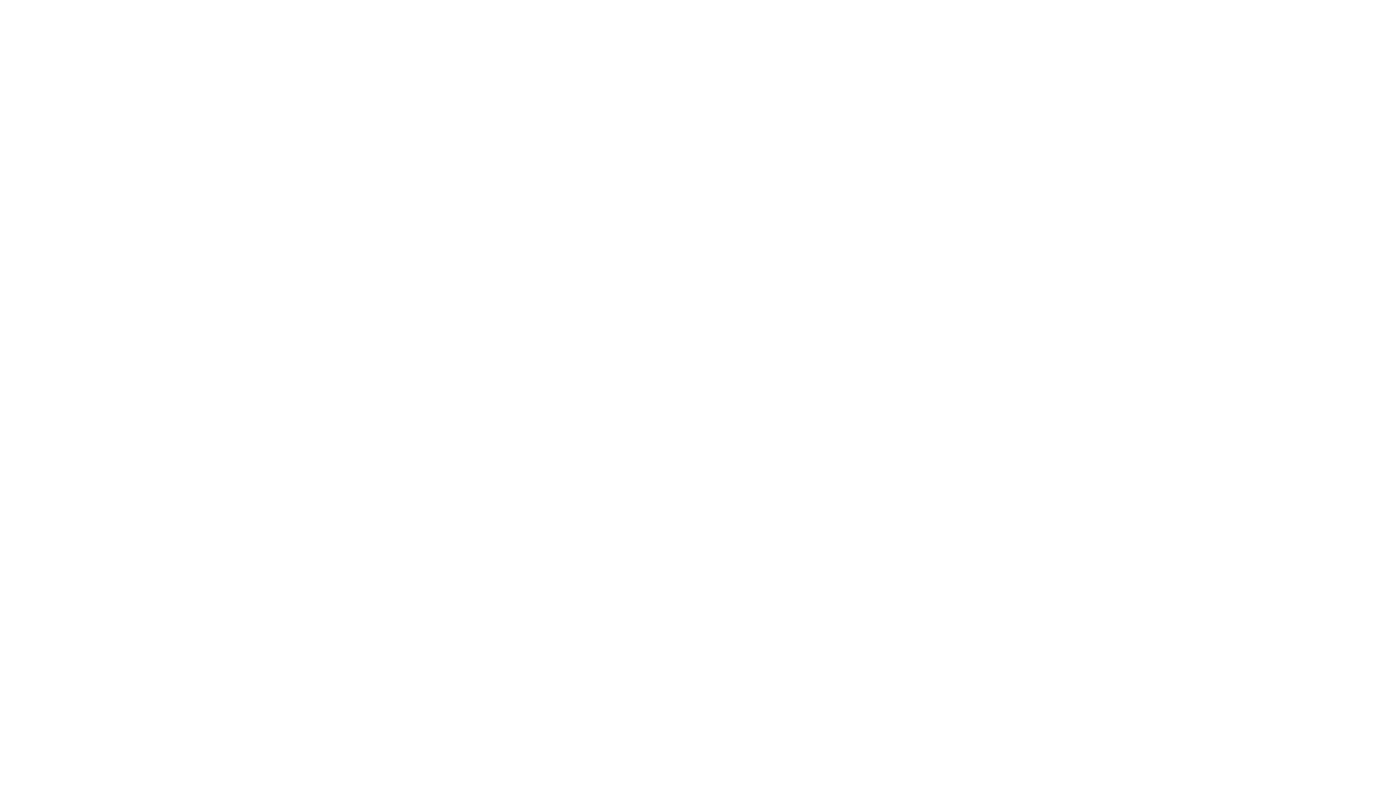

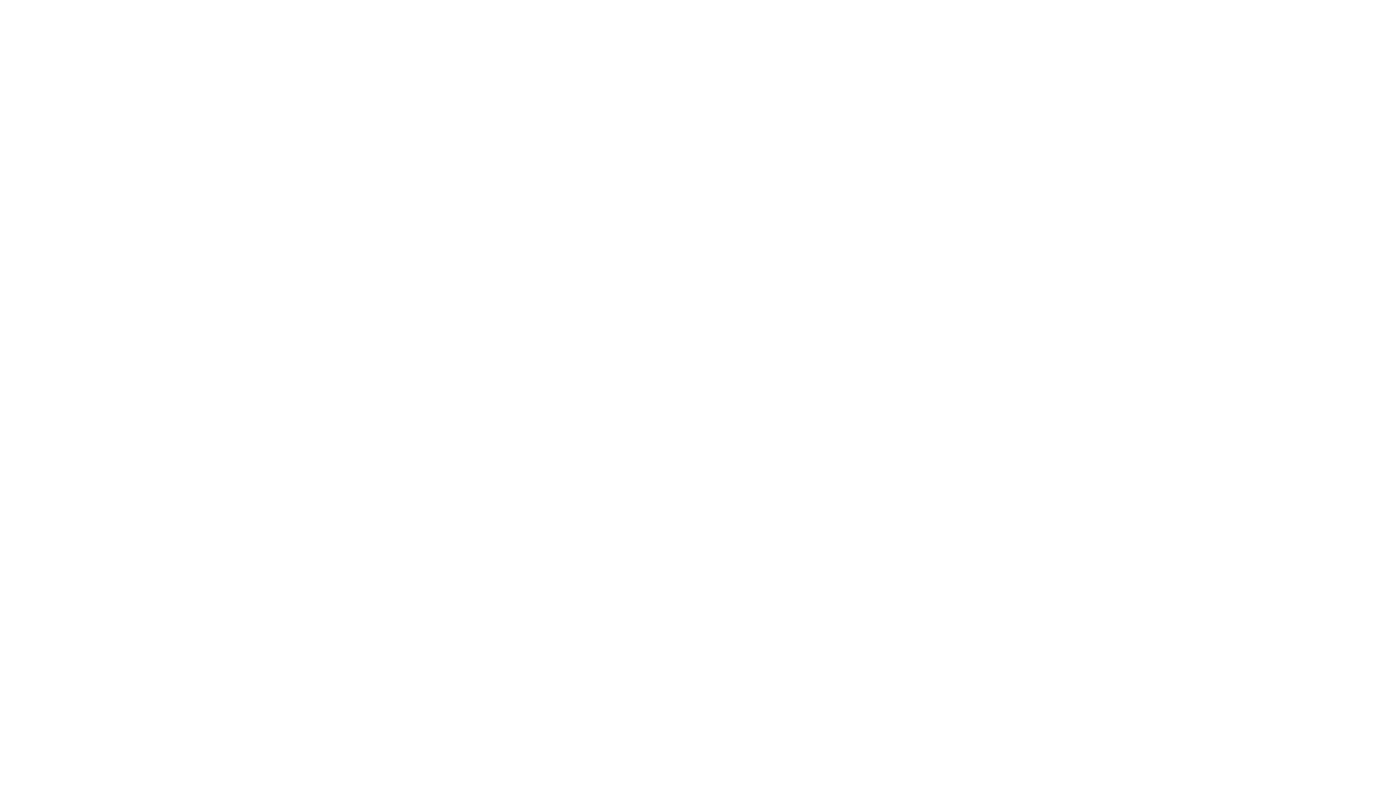

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

def plot_circularity_distribution(results_df, circularity_variable='LFI_kg', group_by='sections', bins=None, isic_section_map=None):
    """
    Plot distribution of circularity values grouped by categories.

    Args:
        results_df (pd.DataFrame): DataFrame containing circularity results.
        circularity_variable (str): The circularity variable to plot (e.g., 'eta-_kg', 'eta+_kg', 'CFI_kg', 'LFI_kg').
        group_by (str): The grouping variable for the colors ('location' or 'ISIC Section').
        bins (list): Bin edges for the histogram. If None, uses default bins.
        isic_section_map (dict): Dictionary mapping ISIC section codes to full names.
    """
    if circularity_variable not in results_df.columns:
        raise ValueError(f"Column '{circularity_variable}' not found in results_df.")

    if group_by not in ['location', 'ISIC Section', 'un_group']:
        raise ValueError("group_by must be 'location' or 'ISIC Section' or 'un_group'.")

    if group_by == 'un_group':
        group_col = 'UN Group'
        title_suffix = 'by UN Group'
    elif group_by == 'location':
        group_col = 'LOCATION Code'
        title_suffix = 'by Location'
    else:
        group_col = 'ISIC Section'
        title_suffix = 'by ISIC Section'

    # Define bins if not provided
    if bins is None:
        bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0, float('inf')]
    
    bin_labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0', '>1.0']
    
    # Create binned data
    data = results_df.copy()
    data['bin'] = pd.cut(data[circularity_variable], bins=bins, labels=bin_labels, include_lowest=True)
    
    # Create cross-tabulation for stacked bars
    cross_tab = pd.crosstab(data['bin'], data[group_col])
    
    # Calculate percentages for annotations
    cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
    
    # Get number of unique groups for color selection
    unique_groups = cross_tab.columns
    n_groups = len(unique_groups)
    
    # IMPROVED COLOR SELECTION - Choose based on number of groups
    if n_groups <= 8:
        # For few groups, use highly distinct colors
        colors = sns.color_palette("Set2", n_groups)
    elif n_groups <= 12:
        # For medium number of groups, use tab20
        colors = sns.color_palette("tab20", n_groups)
    elif n_groups <= 20:
        # For more groups, use color cube for maximum distinction
        colors = sns.color_palette("husl", n_groups)
    else:
        # For many groups, use the most distinct palette available
        colors = sns.color_palette("gist_ncar", n_groups)
    
    # Create the plot
    plt.figure(figsize=(14, 8))  # Slightly wider for better legend spacing
    
    # Create stacked bar plot with improved colors
    ax = cross_tab.plot(kind='bar', stacked=True, figsize=(14, 8), color=colors)
    
    # ADD PERCENTAGE ANNOTATIONS
    # Iterate through each bar (bin) and each segment within the bar
    for i, (bin_label, row) in enumerate(cross_tab.iterrows()):
        # Calculate cumulative height for positioning
        cumulative_height = 0
        total_in_bin = row.sum()
        
        for j, group in enumerate(unique_groups):
            count = row[group]
            percentage = cross_tab_percent.loc[bin_label, group]
            
            # Only annotate if the segment is large enough to be visible
            # Only annotate if the segment is large enough to be visible
            min_percentage = 5  # Minimum percentage threshold
            min_count = 100      # Minimum absolute count threshold
            min_height_ratio = 0.03  # Minimum height ratio of the segment (3% of total bar height)
            # if percentage >= 5:  # Only show percentages for segments >= 5%
            if (percentage >= min_percentage and 
                count >= min_count and 
                (count / total_in_bin) >= min_height_ratio):
                # Position the text in the middle of the segment
                y_pos = cumulative_height + count / 2
                
                # Add text annotation
                ax.text(
                    i,  # x position (bar index)
                    y_pos,  # y position (middle of segment)
                    f'{percentage:.0f}%',  # Text (rounded percentage)
                    ha='center', 
                    va='center',
                    fontsize=8,
                    fontweight='bold',
                    color = 'black' # color='white' if percentage > 20 else 'black'  # White text on dark segments
                )
            
            cumulative_height += count
    
    plt.xlabel(f'{circularity_variable} Ranges')
    plt.ylabel('Count of Activities')
    plt.title(f'Distribution of {circularity_variable} {title_suffix}', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45)
    
    # CREATE IMPROVED LEGEND LABELS
    if group_by == 'ISIC Section' and isic_section_map is not None:
        # Create legend labels using the mapping
        legend_labels = []
        for group in unique_groups:
            if group in isic_section_map:
                legend_labels.append(f"{group}: {isic_section_map[group]}")
            else:
                legend_labels.append(f"{group}: Unknown")
        
        # Create custom legend
        handles, _ = ax.get_legend_handles_labels()
        plt.legend(
            handles=handles,
            labels=legend_labels,
            bbox_to_anchor=(1.05, 1), 
            loc='upper left', 
            title=group_col,
            fontsize=8,  # Smaller font to accommodate longer labels
            title_fontsize=10
        )
    else:
        # Standard legend for other group types
        plt.legend(
            bbox_to_anchor=(1.05, 1), 
            loc='upper left', 
            title=group_col,
            fontsize=9,
            title_fontsize=10
        )
    
    # Add grid for better readability
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    
    # save the graphs
    save_path = "results_histogram_1-plot-per-CI"
    os.makedirs(save_path, exist_ok=True)
    filename = f"{save_path}/{circularity_variable}_distribution_{group_by}.png"
    plt.savefig(filename, dpi=500, bbox_inches='tight')
    print(f"Plot saved as: {filename}")
    
    plt.show()
    
    # Print some statistics
    print(f"Total activities: {len(results_df)}")
    print(f"Number of {group_col} groups: {n_groups}")
    print(f"\nDistribution of {circularity_variable}:")
    for bin_label in bin_labels:
        count = len(data[data['bin'] == bin_label])
        percentage = (count / len(data)) * 100
        print(f"{bin_label}: {count} activities ({percentage:.1f}%)")
    
    # Print detailed percentage breakdown by group for each bin
    print(f"\nDetailed percentage breakdown by {group_col}:")
    for bin_label in bin_labels:
        if bin_label in cross_tab_percent.index:
            print(f"\n{bin_label} range:")
            bin_percentages = cross_tab_percent.loc[bin_label]
            for group in unique_groups:
                percentage = bin_percentages[group]
                if percentage > 0:  # Only show groups with presence in this bin
                    print(f"  {group}: {percentage:.1f}%")

# Example usage with your dictionary
if __name__ == "__main__":
    # Assuming results_df is your DataFrame with circularity results
    # Plot with ISIC sections using the mapping
    plot_circularity_distribution(
        results_df, 
        circularity_variable='LFI_kg', 
        group_by='ISIC Section', 
        isic_section_map=isic_section_map
    )
    plot_circularity_distribution(
        results_df, 
        circularity_variable='CFI_kg', 
        group_by='ISIC Section', 
        isic_section_map=isic_section_map
    )
    plot_circularity_distribution(
        results_df, 
        circularity_variable='LFI_MJ', 
        group_by='ISIC Section', 
        isic_section_map=isic_section_map
    )
    plot_circularity_distribution(
        results_df, 
        circularity_variable='CFI_MJ', 
        group_by='ISIC Section', 
        isic_section_map=isic_section_map
    )
    
    # Other plots (the mapping won't be used for these)
    plot_circularity_distribution(
        results_df, 
        circularity_variable='eta-_kg', 
        group_by='un_group'
    )
    plot_circularity_distribution(
        results_df, 
        circularity_variable='eta-_kg', 
        group_by='ISIC Section',
        isic_section_map=isic_section_map
    )
    plot_circularity_distribution(
        results_df, 
        circularity_variable='eta+_kg', 
        group_by='ISIC Section',
        isic_section_map=isic_section_map
    )
    plot_circularity_distribution(
        results_df, 
        circularity_variable='eta+_kg', 
        group_by='un_group'
    )
    plot_circularity_distribution(
        results_df, 
        circularity_variable='eta-_MJ', 
        group_by='un_group'
    )
    plot_circularity_distribution(
        results_df, 
        circularity_variable='eta-_MJ', 
        group_by='ISIC Section',
        isic_section_map=isic_section_map
    )
    plot_circularity_distribution(
        results_df, 
        circularity_variable='eta+_MJ', 
        group_by='un_group'
    )
    plot_circularity_distribution(
        results_df, 
        circularity_variable='eta+_MJ', 
        group_by='ISIC Section',
        isic_section_map=isic_section_map
    )

### live comparison energy-mass

In [11]:
def plot_hybrid_scale_scatter(results_df, save_path_2="basic_plots", group_by="section", isic_section_map=None):
    """
    Create scatter plots of LFI, CFI, eta+, and eta- in kg vs MJ with a hybrid scale.
    """
    import os
    import seaborn as sns
    import matplotlib.ticker as ticker
    import matplotlib.pyplot as plt
    import numpy as np
    import mplcursors

    if results_df.empty:
        print("No data to plot.")
        return

    if group_by.lower() == "section":
        col = "ISIC Section"
    elif group_by.lower() == "division":
        col = "ISIC Division"
    elif group_by.lower() == "description":
        col = "ISIC Description"
    elif group_by.lower() == "location":
        col = "LOCATION Code"
    elif group_by.lower() == "un_group":
        col = "UN Group"
    else:
        raise ValueError("group_by must be 'section', 'division', or 'description'")

    os.makedirs(save_path_2, exist_ok=True)
    
    # Get unique groups and sort them for consistent color assignment
    unique_groups = sorted(results_df[col].dropna().unique())
    n_groups = len(unique_groups)
    
    # USE THE SAME COLOR LOGIC AS plot_circularity_distribution
    if n_groups <= 8:
        # For few groups, use highly distinct colors
        colors = sns.color_palette("Set2", n_groups)
    elif n_groups <= 12:
        # For medium number of groups, use tab20
        colors = sns.color_palette("tab20", n_groups)
    elif n_groups <= 20:
        # For more groups, use color cube for maximum distinction
        colors = sns.color_palette("husl", n_groups)
    else:
        # For many groups, use the most distinct palette available
        colors = sns.color_palette("gist_ncar", n_groups)
        
    # Create color map with sorted groups
    color_map = dict(zip(unique_groups, colors))
    
    # CREATE LEGEND LABELS (same as in plot_circularity_distribution)
    if col == "ISIC Section" and isic_section_map is not None:
        legend_labels = []
        for group in unique_groups:
            if group in isic_section_map:
                legend_labels.append(f"{group}: {isic_section_map[group]}")
            else:
                legend_labels.append(f"{group}: Unknown")
    else:
        legend_labels = None

    class LinearLogTransform:
        input_dims = output_dims = 1
        def transform(self, a):
            a = np.clip(a, 1e-10, None)
            return np.where(a <= 1, a, np.log10(a) + 1)
        def inverted(self):
            return InvertedLinearLogTransform()

    class InvertedLinearLogTransform:
        input_dims = output_dims = 1
        def transform(self, a):
            return np.where(a <= 1, a, 10**(a - 1))
        def inverted(self):
            return LinearLogTransform()

    linear_log_transform = LinearLogTransform()
    inverted_linear_log_transform = InvertedLinearLogTransform()

    # Helper function to create scatter plots with consistent styling
    def create_scatter_plot(ax, x_col, y_col, title, x_label, y_label, x_ticks, y_ticks):
        scatter_artists = []  # Store scatter artists
        scatter_subsets = []  # Store subset corresponding to each artist
    
        for grp in unique_groups:
            subset = results_df[results_df[col] == grp]
    
            points = ax.scatter(
                subset[x_col].values,
                subset[y_col].values,
                color=color_map[grp],
                label=grp,  # <-- Add this line back
                alpha=0.4,
                s=10
            )
    
            scatter_artists.append(points)
            scatter_subsets.append(subset.reset_index(drop=True))
    
        ax.xaxis.set_major_locator(ticker.FixedLocator(x_ticks))
        ax.yaxis.set_major_locator(ticker.FixedLocator(y_ticks))
        ax.plot([min(x_ticks), max(x_ticks)], [min(y_ticks), max(y_ticks)], 'r--', alpha=1, label='y = x (Equality Line)')
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.set_title(title)
        ax.grid(True, alpha=0.3)
    
        # Apply consistent legend styling
        if legend_labels is not None:
            handles, labels = ax.get_legend_handles_labels()
    
            # Remove the equality line from handles/labels and add it separately
            equality_line_handle = handles[-1]
            equality_line_label = labels[-1]
            handles = handles[:-1]
            labels = legend_labels  # Use custom labels for the groups
    
            # Add equality line back
            handles.append(equality_line_handle)
            labels.append(equality_line_label)
    
            ax.legend(
                handles=handles,
                labels=labels,
                bbox_to_anchor=(1.05, 1),
                loc='upper left',
                title=col,
                fontsize=8,
                title_fontsize=10
            )
        else:
            ax.legend(
                bbox_to_anchor=(1.05, 1),
                loc='upper left',
                title=col,
                fontsize=9,
                title_fontsize=10
            )
    
        return scatter_artists, scatter_subsets

    # LFI scatter plot
    fig1, ax1 = plt.subplots(figsize=(10, 8))
    ax1.set_xscale('function', functions=(linear_log_transform.transform, inverted_linear_log_transform.transform))
    ax1.set_yscale('function', functions=(linear_log_transform.transform, inverted_linear_log_transform.transform))
    artists1, subsets1 = create_scatter_plot(
        ax1, 'LFI_kg', 'LFI_MJ',
        f'Linear Flow Index: kg vs MJ (Hybrid Scale) by {col}',
        'LFI (kg-eq)', 'LFI (MJ-eq)', [0, 0.5, 1], [0, 0.48, 0.49, 0.5, 0.51, 0.52, 1]
    )
    fig1.tight_layout()
    fig1.savefig(f"{save_path_2}/LFI_hybrid_scale_by_{group_by}.png", dpi=500, bbox_inches='tight')

    cursor = mplcursors.cursor(artists1, hover=True)
    
    @cursor.connect("add")
    def on_add(sel):
        artist_id = artists1.index(sel.artist)        # which group
        subset = subsets1[artist_id]                  # corresponding subset
        idx = sel.index                               # index inside subset
    
        row = subset.iloc[idx]
        sel.annotation.set(
            text=(
                f"Process: {row['Process Name']}\n"
                f"Location: {row['Location']}\n"
                f"Reference Product: {row['Reference Product']}"
            ),
            fontsize=8
        )
    plt.show()

    # plt.close(fig1)

    # CFI scatter plot
    fig2, ax2 = plt.subplots(figsize=(10, 8))
    ax2.set_xscale('function', functions=(linear_log_transform.transform, inverted_linear_log_transform.transform))
    ax2.set_yscale('function', functions=(linear_log_transform.transform, inverted_linear_log_transform.transform))
    create_scatter_plot(ax2, 'CFI_kg', 'CFI_MJ', 
                       f'Circular Flow Index: kg vs MJ (Hybrid Scale) by {col}',
                       'CFI (kg-eq)', 'CFI (MJ-eq)', [0, 0.5, 1], [0, 0.5, 1])
    fig2.tight_layout()
    fig2.savefig(f"{save_path_2}/CFI_hybrid_scale_by_{group_by}.png", dpi=500, bbox_inches='tight')
    plt.close(fig2)

    # eta- scatter plot
    fig3, ax3 = plt.subplots(figsize=(10, 8))
    ax3.set_xscale('function', functions=(linear_log_transform.transform, inverted_linear_log_transform.transform))
    ax3.set_yscale('function', functions=(linear_log_transform.transform, inverted_linear_log_transform.transform))
    create_scatter_plot(ax3, 'eta-_kg', 'eta-_MJ', 
                       f'Efficiency Negative: kg vs MJ (Hybrid Scale) by {col}',
                       'η⁻ (kg-eq)', 'η⁻ (MJ-eq)', [0, 0.5, 1], [0, 0.5, 1])
    fig3.tight_layout()
    fig3.savefig(f"{save_path_2}/eta-_hybrid_scale_by_{group_by}.png", dpi=500, bbox_inches='tight')
    plt.close(fig3)

    # eta+ scatter plot
    fig4, ax4 = plt.subplots(figsize=(10, 8))
    ax4.set_xscale('function', functions=(linear_log_transform.transform, inverted_linear_log_transform.transform))
    ax4.set_yscale('function', functions=(linear_log_transform.transform, inverted_linear_log_transform.transform))
    create_scatter_plot(ax4, 'eta+_kg', 'eta+_MJ', 
                       f'Efficiency Positive: kg vs MJ (Hybrid Scale) by {col}',
                       'η⁺ (kg-eq)', 'η⁺ (MJ-eq)', [0, 0.5, 1], [0, 0.5, 1])
    fig4.tight_layout()
    fig4.savefig(f"{save_path_2}/eta+_hybrid_scale_by_{group_by}.png", dpi=500, bbox_inches='tight')
    plt.close(fig4)

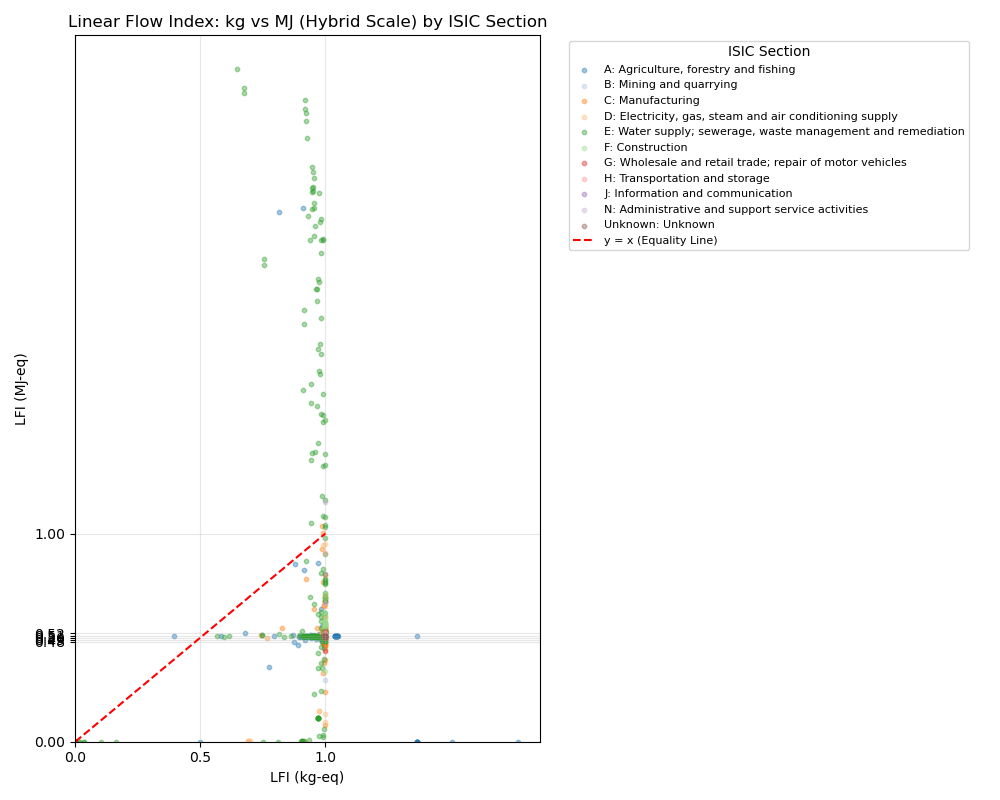

C:\Users\lfreboeuf\AppData\Local\Temp\ipykernel_20828\1804185888.py:123: UserWarning: Mismatched number of handles and labels: len(handles) = 12 len(labels) = 13
  ax.legend(
C:\Users\lfreboeuf\AppData\Local\Temp\ipykernel_20828\1804185888.py:123: UserWarning: Mismatched number of handles and labels: len(handles) = 12 len(labels) = 14
  ax.legend(
C:\Users\lfreboeuf\AppData\Local\Temp\ipykernel_20828\1804185888.py:123: UserWarning: Mismatched number of handles and labels: len(handles) = 12 len(labels) = 15
  ax.legend(


In [12]:
# Define the save path
save_path_2 = "results_plots_comparison-kg-mj"

if __name__ == "__main__":
    plot_hybrid_scale_scatter(loaded_df, save_path_2=save_path_2, group_by="section", isic_section_map=isic_section_map)

### live comparison efficiency/inefficiency

In [13]:
def plot_cross_indicator_scatter(results_df, save_path="basic_plots", group_by="section", isic_section_map=None):
    """
    Create hybrid-scale scatter plots comparing indicators (LFI vs CFI, eta+ vs eta-) 
    for both kg and MJ bases, grouped by ISIC or location.
    """
    import os
    import seaborn as sns
    import matplotlib.ticker as ticker
    import matplotlib.pyplot as plt
    import numpy as np
    import mplcursors

    if results_df.empty:
        print("No data to plot.")
        return

    # Map grouping column
    group_cols = {
        "section": "ISIC Section",
        "division": "ISIC Division", 
        "description": "ISIC Description",
        "location": "LOCATION Code",
        "un_group": "UN Group"
    }
    col = group_cols.get(group_by.lower())
    if not col:
        raise ValueError("group_by must be 'section', 'division', 'description', 'location', or 'un_group'")

    os.makedirs(save_path, exist_ok=True)
    
    # Get unique groups and sort them for consistent color assignment
    unique_groups = sorted(results_df[col].dropna().unique())
    n_groups = len(unique_groups)
    
    # USE THE SAME COLOR LOGIC AS plot_circularity_distribution
    if n_groups <= 8:
        # For few groups, use highly distinct colors
        colors = sns.color_palette("Set2", n_groups)
    elif n_groups <= 12:
        # For medium number of groups, use tab20
        colors = sns.color_palette("tab20", n_groups)
    elif n_groups <= 20:
        # For more groups, use color cube for maximum distinction
        colors = sns.color_palette("husl", n_groups)
    else:
        # For many groups, use the most distinct palette available
        colors = sns.color_palette("gist_ncar", n_groups)
        
    # Create color map with sorted groups
    color_map = dict(zip(unique_groups, colors))
    
    # CREATE LEGEND LABELS (same as in plot_circularity_distribution)
    if col == "ISIC Section" and isic_section_map is not None:
        legend_labels = []
        for group in unique_groups:
            if group in isic_section_map:
                legend_labels.append(f"{group}: {isic_section_map[group]}")
            else:
                legend_labels.append(f"{group}: Unknown")
    else:
        legend_labels = None

    # Hybrid scale transformation
    class LinearLogTransform:
        input_dims = output_dims = 1
        def transform(self, a):
            a = np.clip(a, 1e-10, None)
            return np.where(a <= 1, a, np.log10(a) + 1)
        def inverted(self):
            return InvertedLinearLogTransform()

    class InvertedLinearLogTransform:
        input_dims = output_dims = 1
        def transform(self, a):
            return np.where(a <= 1, a, 10**(a - 1))
        def inverted(self):
            return LinearLogTransform()

    linear_log_transform = LinearLogTransform()
    inverted_linear_log_transform = InvertedLinearLogTransform()

    # Define pairs to plot
    pairs = [
        ("LFI_kg", "CFI_kg", "Linear vs Circular Flow Index (kg-eq)", "LFI (kg-eq)", "CFI (kg-eq)"),
        ("LFI_MJ", "CFI_MJ", "Linear vs Circular Flow Index (MJ-eq)", "LFI (MJ-eq)", "CFI (MJ-eq)"),
        ("eta+_kg", "eta-_kg", "Efficiency Positive vs Negative (kg-eq)", "η⁺ (kg-eq)", "η⁻ (kg-eq)"),
        ("eta+_MJ", "eta-_MJ", "Efficiency Positive vs Negative (MJ-eq)", "η⁺ (MJ-eq)", "η⁻ (MJ-eq)")
    ]

    for x_var, y_var, title, x_label, y_label in pairs:
        fig, ax = plt.subplots(figsize=(10, 8))
        ax.set_xscale('function', functions=(linear_log_transform.transform, inverted_linear_log_transform.transform))
        ax.set_yscale('function', functions=(linear_log_transform.transform, inverted_linear_log_transform.transform))

        # Store scatter artists and subsets for hover functionality
        scatter_artists = []  # Store scatter artists
        scatter_subsets = []  # Store subset corresponding to each artist

        for grp in unique_groups:
            subset = results_df[results_df[col] == grp]

            points = ax.scatter(
                subset[x_var].values,
                subset[y_var].values,
                color=color_map[grp],
                label=grp,
                alpha=0.4,
                s=10
            )

            scatter_artists.append(points)
            scatter_subsets.append(subset.reset_index(drop=True))

        # Define plot limits and draw balanced line
        lim = [0, 1]
        ax.plot([0, 1], [1, 0], 'r--', alpha=1, label='x + y = 1 (balanced)')
        ax.xaxis.set_major_locator(ticker.FixedLocator(lim))
        ax.yaxis.set_major_locator(ticker.FixedLocator(lim))
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.set_title(f"{title} (Hybrid Scale) by {col}")
        ax.grid(True, alpha=0.3)
        
        # Apply consistent legend styling
        if legend_labels is not None:
            handles, labels = ax.get_legend_handles_labels()
            
            # Remove the balanced line from handles/labels and add it separately
            balanced_line_handle = handles[-1]
            balanced_line_label = labels[-1]
            handles = handles[:-1]
            labels = legend_labels  # Use our custom labels for the groups
            
            # Add balanced line back
            handles.append(balanced_line_handle)
            labels.append(balanced_line_label)
            
            ax.legend(
                handles=handles,
                labels=labels,
                bbox_to_anchor=(1.05, 1), 
                loc='upper left',
                title=col,
                fontsize=8,
                title_fontsize=10
            )
        else:
            ax.legend(
                bbox_to_anchor=(1.05, 1), 
                loc='upper left',
                title=col,
                fontsize=9,
                title_fontsize=10
            )
            
        fig.tight_layout()
        fig.savefig(f"{save_path}/{x_var}_vs_{y_var}_hybrid_by_{group_by}.png", dpi=500, bbox_inches='tight')
        
        # Add interactive hover functionality
        cursor = mplcursors.cursor(scatter_artists, hover=True)
        
        # Capture current loop variables by creating a closure
        def make_on_add(current_x_var, current_y_var, current_x_label, current_y_label):
            def on_add(sel):
                artist_id = scatter_artists.index(sel.artist)        # which group
                subset = scatter_subsets[artist_id]                  # corresponding subset
                idx = sel.index                                      # index inside subset
            
                row = subset.iloc[idx]
                sel.annotation.set(
                    text=(
                        f"Process: {row['Process Name']}\n"
                        f"Location: {row['Location']}\n"
                        f"Reference Product: {row['Reference Product']}\n"
                        f"Group: {row[col]}\n"
                        f"{current_x_label}: {row[current_x_var]:.4f}\n"
                        f"{current_y_label}: {row[current_y_var]:.4f}"
                    ),
                    fontsize=8
                )
            return on_add
        
        # Connect the callback with current loop variables
        cursor.connect("add", make_on_add(x_var, y_var, x_label, y_label))
        
        # Show the interactive plot
        plt.show()

        # Optional: close the figure if needed
        # plt.close(fig)

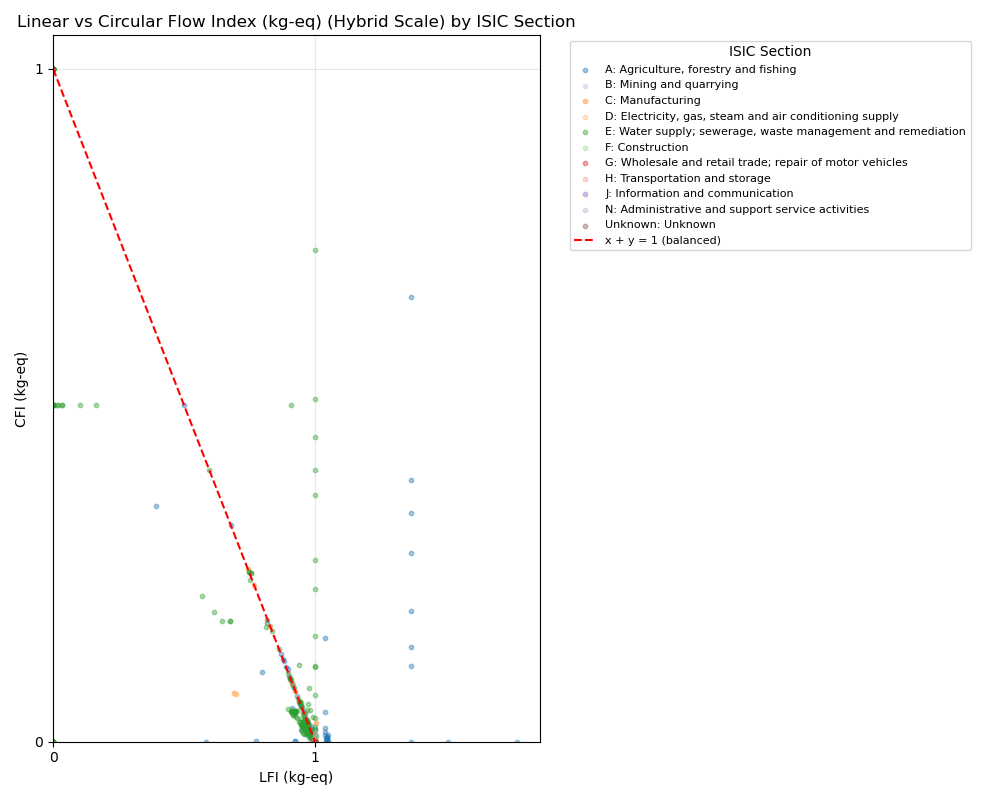

C:\Users\lfreboeuf\AppData\Local\Temp\ipykernel_20828\4169642732.py:138: UserWarning: Mismatched number of handles and labels: len(handles) = 12 len(labels) = 13
  ax.legend(


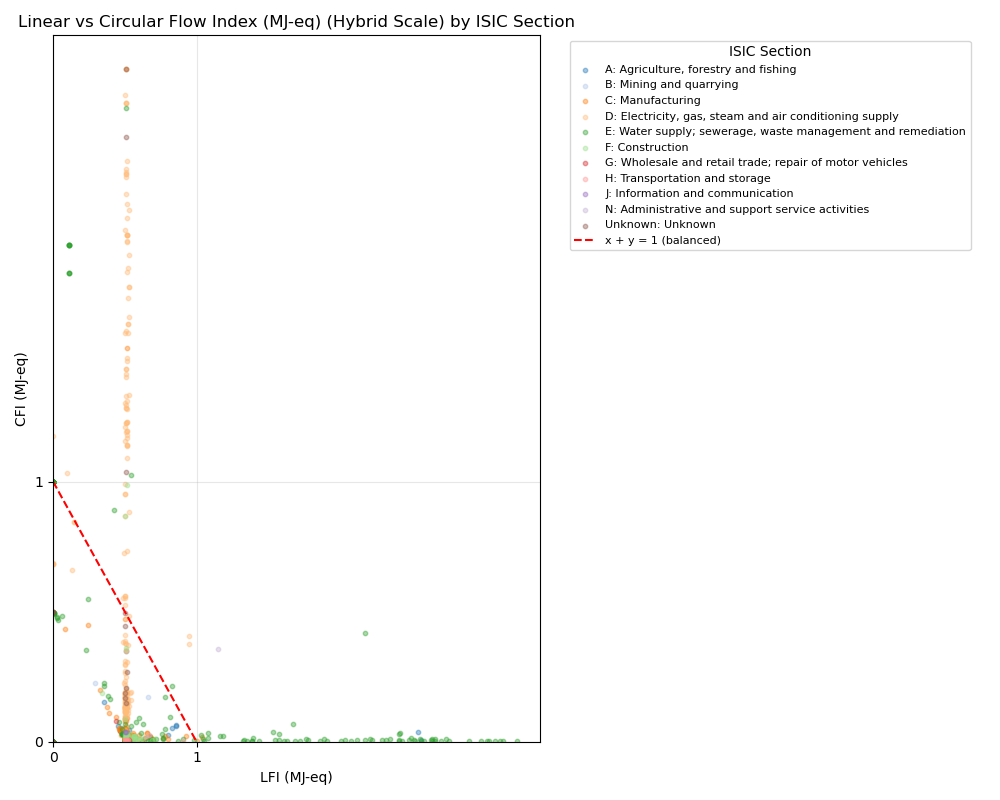

C:\Users\lfreboeuf\AppData\Local\Temp\ipykernel_20828\4169642732.py:138: UserWarning: Mismatched number of handles and labels: len(handles) = 12 len(labels) = 14
  ax.legend(


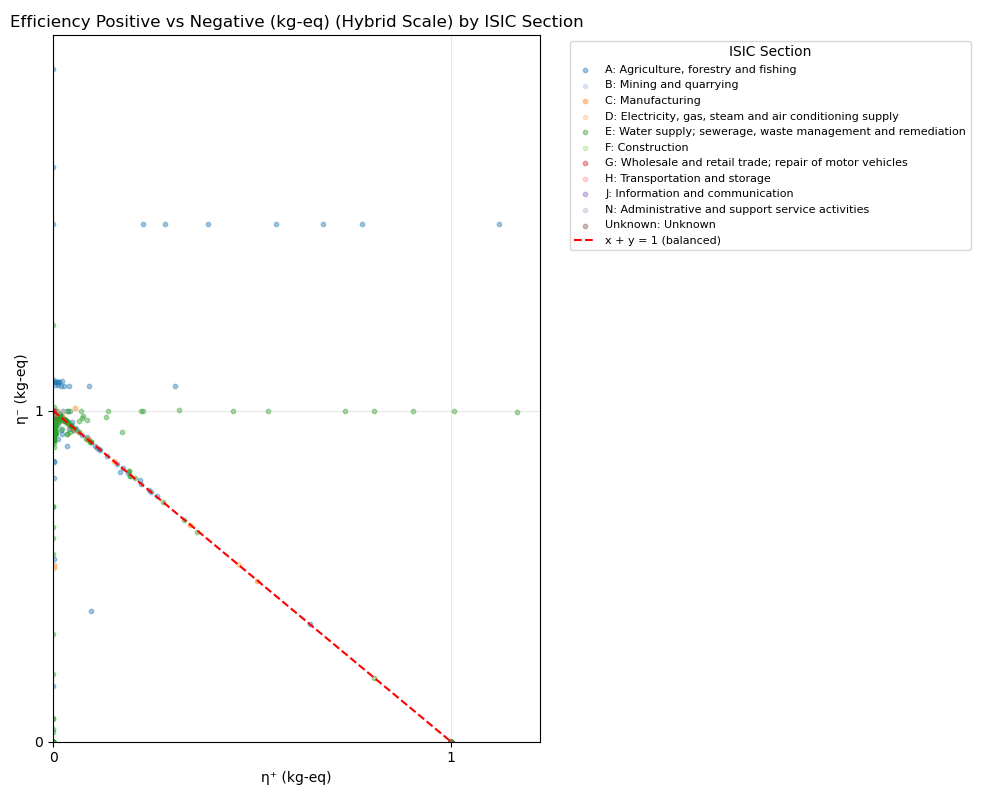

C:\Users\lfreboeuf\AppData\Local\Temp\ipykernel_20828\4169642732.py:138: UserWarning: Mismatched number of handles and labels: len(handles) = 12 len(labels) = 15
  ax.legend(


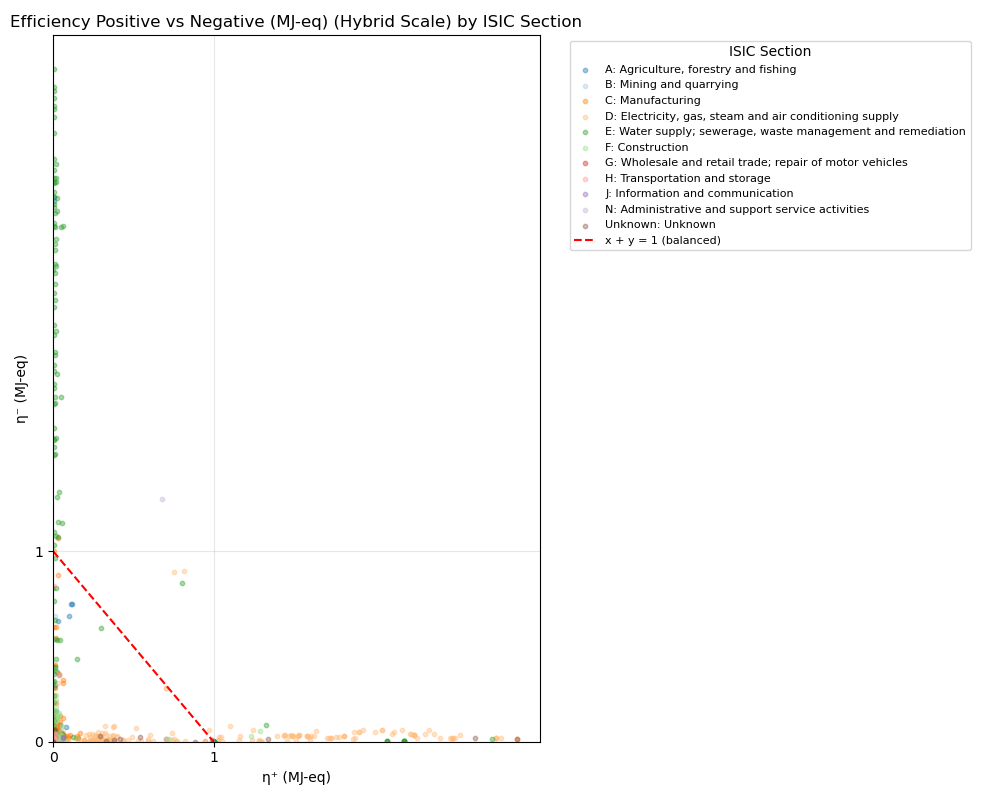

In [15]:
# Define the save path
save_path_3 = "results_plots_comparison_+&-approaches"

if __name__ == "__main__":
    plot_cross_indicator_scatter(loaded_df, save_path=save_path_3, group_by="section", isic_section_map=isic_section_map)

# long run, save the results and load them

## save

In [8]:
import pandas as pd
import pickle
import os

def save_results_df(results_df, filename="circularity_results"):
    """
    Simple save function using pickle (preserves everything)
    """
    filepath = os.path.join(os.getcwd(), f"{filename}.pkl")
    with open(filepath, 'wb') as f:
        pickle.dump(results_df, f)
    print(f"✅ Saved to {filepath}")
    print(f"   Shape: {results_df.shape}")
    return filepath

# Save with pickle (this preserves everything exactly)
# name the results consistently:
# - with how you considered the material flows: did you include water flows? (if yes, => "_with_water")
# - with how many unit processes you analysed (if 1000 random activities are selected, => "_1k")
save_results_df(results_df, "circularity_final_with-water_1k") 


✅ Saved to C:\Users\lfreboeuf\Documents\1A_work_thesis\4_Inventory_resource\1clci_code-bw2\github\circularity_LCA-resource-flows_brightway2\circularity_final_with-water_1k.pkl
   Shape: (1000, 29)


'C:\\Users\\lfreboeuf\\Documents\\1A_work_thesis\\4_Inventory_resource\\1clci_code-bw2\\github\\circularity_LCA-resource-flows_brightway2\\circularity_final_with-water_1k.pkl'

## load

In [9]:
import pandas as pd
import pickle
import os

def load_results_df(filename="circularity_results"):
    """
    Simple load function using pickle
    """
    filepath = os.path.join(os.getcwd(), f"{filename}.pkl")
    if os.path.exists(filepath):
        with open(filepath, 'rb') as f:
            df = pickle.load(f)
        print(f"✅ Loaded from {filepath}")
        print(f"   Shape: {df.shape}")
        return df
    else:
        raise FileNotFoundError(f"File not found: {filepath}")
        
# Load it back
loaded_df = load_results_df("circularity_final_with-water_1k")

✅ Loaded from C:\Users\lfreboeuf\Documents\1A_work_thesis\4_Inventory_resource\1clci_code-bw2\github\circularity_LCA-resource-flows_brightway2\circularity_final_with-water_1k.pkl
   Shape: (1000, 29)


## checking

In [108]:
def simple_check(original_df, loaded_df):
    """
    Simple check if DataFrames are equal
    """
    print("🔍 Simple Check:")
    print(f"   Shapes: {original_df.shape} vs {loaded_df.shape} → {'✅' if original_df.shape == loaded_df.shape else '❌'}")
    print(f"   Columns match: {'✅' if list(original_df.columns) == list(loaded_df.columns) else '❌'}")
    print(f"   Null counts: {original_df.isnull().sum().sum()} vs {loaded_df.isnull().sum().sum()} → {'✅' if original_df.isnull().sum().sum() == loaded_df.isnull().sum().sum() else '❌'}")
    print(f"   Are equal: {'✅ YES' if original_df.equals(loaded_df) else '❌ NO'}")
    
    # Show which columns have different null counts
    if not original_df.equals(loaded_df):
        print("\n🔍 Differences found:")
        for col in original_df.columns:
            orig_nulls = original_df[col].isnull().sum()
            loaded_nulls = loaded_df[col].isnull().sum()
            if orig_nulls != loaded_nulls:
                print(f"   {col}: {orig_nulls} vs {loaded_nulls} nulls")
    
    return original_df.equals(loaded_df)

# Simple check
simple_check(results_df, loaded_df)

🔍 Simple Check:
   Shapes: (10000, 29) vs (10000, 29) → ✅
   Columns match: ✅
   Null counts: 0 vs 0 → ✅
   Are equal: ✅ YES


True